1. Exploratory Data Analysis

In [15]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

2. Read the dataset into a dataframe

In [16]:
# read the dataset into a dataframe
df = pd.read_csv('metrics_data.csv')
df.head()

,timestamp,cpu_usage,memory_usage,load_capacity,error_rate,throughput,is_holiday
0,2025-01-01 00:00:00,40.66,31.35,0.40,0.18,981,0
1,2025-01-01 01:00:00,47.16,32.21,0.22,4.04,736,0
2,2025-01-01 02:00:00,88.40,78.33,0.18,2.18,1393,0
3,2025-01-01 03:00:00,29.03,69.94,0.68,0.35,111,0
4,2025-01-01 04:00:00,93.76,30.10,0.90,3.03,1092,0


3.Here I start cleaning the data. Firstly, converting Timestamp to datetime64

In [17]:
# Diagnostic prints
print("Column names:", df.columns.tolist())
print("\nData types of columns:\n", df.dtypes)
print("\nFirst few rows of timestamp column:\n", df['timestamp'].head())

Column names: ['timestamp', 'cpu_usage', 'memory_usage', 'load_capacity', 'error_rate', 'throughput', 'is_holiday']

Data types of columns:
 timestamp         object
cpu_usage        float64
memory_usage     float64
load_capacity    float64
error_rate       float64
throughput         int64
is_holiday         int64
dtype: object

First few rows of timestamp column:
 0    2025-01-01 00:00:00
1    2025-01-01 01:00:00
2    2025-01-01 02:00:00
3    2025-01-01 03:00:00
4    2025-01-01 04:00:00
Name: timestamp, dtype: object


Print dense

In [18]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract components in desired format
df['year'] = df['timestamp'].dt.year  # e.g., 2025
df['month'] = df['timestamp'].dt.strftime('%b')  # e.g., Jan
df['day'] = df['timestamp'].dt.day  # e.g., 1-31
df['time'] = df['timestamp'].dt.strftime('%H:%M:%S')  # e.g., 01:00:00

# Display the first few rows with new format
print("\nDataset with formatted timestamp components:")
print(df[['timestamp', 'year', 'month', 'day', 'time']].head())

# Verify unique values
print("\nUnique values in each component:")
print("Years:", df['year'].unique())
print("Months:", df['month'].unique())
print("Days:", df['day'].unique())
print("Times:", df['time'].unique())


Dataset with formatted timestamp components:
            timestamp  year month  day      time
0 2025-01-01 00:00:00  2025   Jan    1  00:00:00
1 2025-01-01 01:00:00  2025   Jan    1  01:00:00
2 2025-01-01 02:00:00  2025   Jan    1  02:00:00
3 2025-01-01 03:00:00  2025   Jan    1  03:00:00
4 2025-01-01 04:00:00  2025   Jan    1  04:00:00

Unique values in each component:
Years: [2025 2026]
Months: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Days: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Times: ['00:00:00' '01:00:00' '02:00:00' '03:00:00' '04:00:00' '05:00:00'
 '06:00:00' '07:00:00' '08:00:00' '09:00:00' '10:00:00' '11:00:00'
 '12:00:00' '13:00:00' '14:00:00' '15:00:00' '16:00:00' '17:00:00'
 '18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00']


In [19]:
# sets the index as the date
df.index = df.timestamp
#Resamples the data to the average daily value of each column. Removes excessive frequency
#df = df.resample('D').mean()
#drops any missing values that are present
df = df.dropna()
df.head()

,timestamp,cpu_usage,memory_usage,load_capacity,error_rate,throughput,is_holiday,year,month,day,time
timestamp,,,,,,,,,,,
2025-01-01 00:00:00,2025-01-01 00:00:00,40.66,31.35,0.40,0.18,981,0,2025,Jan,1,00:00:00
2025-01-01 01:00:00,2025-01-01 01:00:00,47.16,32.21,0.22,4.04,736,0,2025,Jan,1,01:00:00
2025-01-01 02:00:00,2025-01-01 02:00:00,88.40,78.33,0.18,2.18,1393,0,2025,Jan,1,02:00:00
2025-01-01 03:00:00,2025-01-01 03:00:00,29.03,69.94,0.68,0.35,111,0,2025,Jan,1,03:00:00
2025-01-01 04:00:00,2025-01-01 04:00:00,93.76,30.10,0.90,3.03,1092,0,2025,Jan,1,04:00:00


In [20]:
print(df.shape)

(10000, 11)


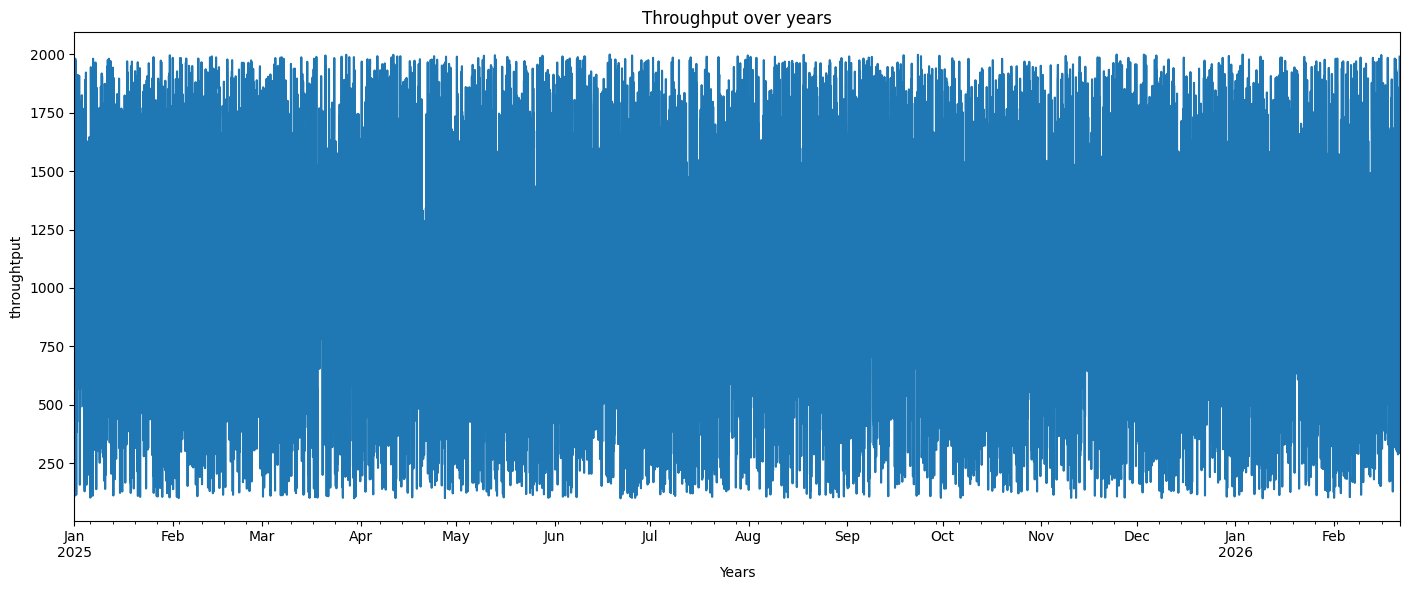

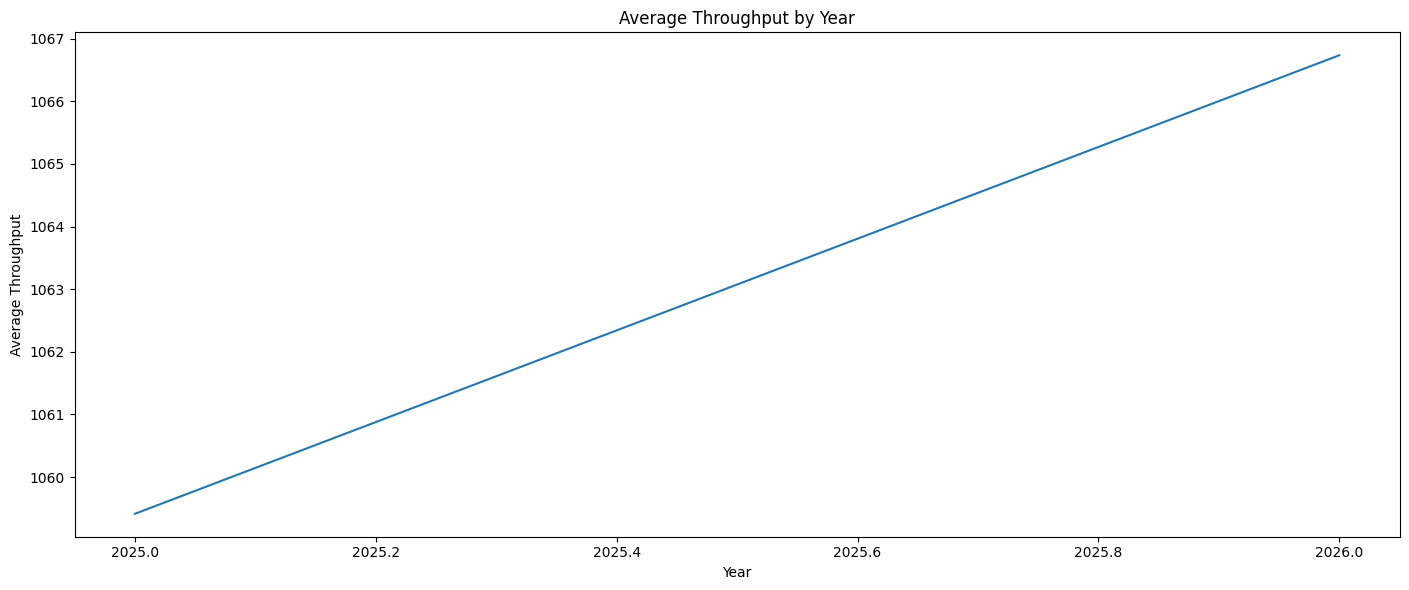

<Figure size 1400x600 with 0 Axes>

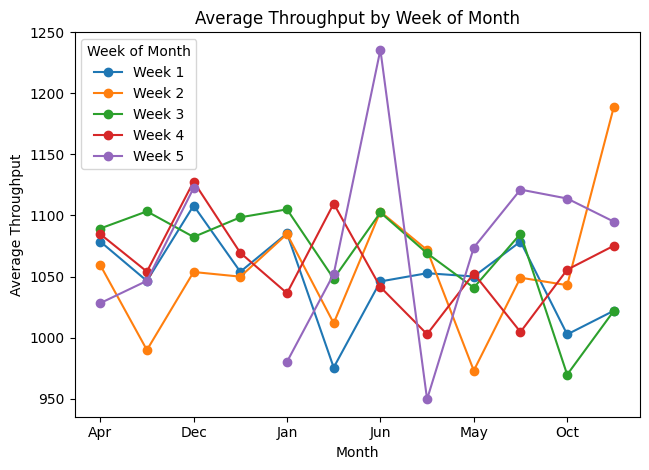

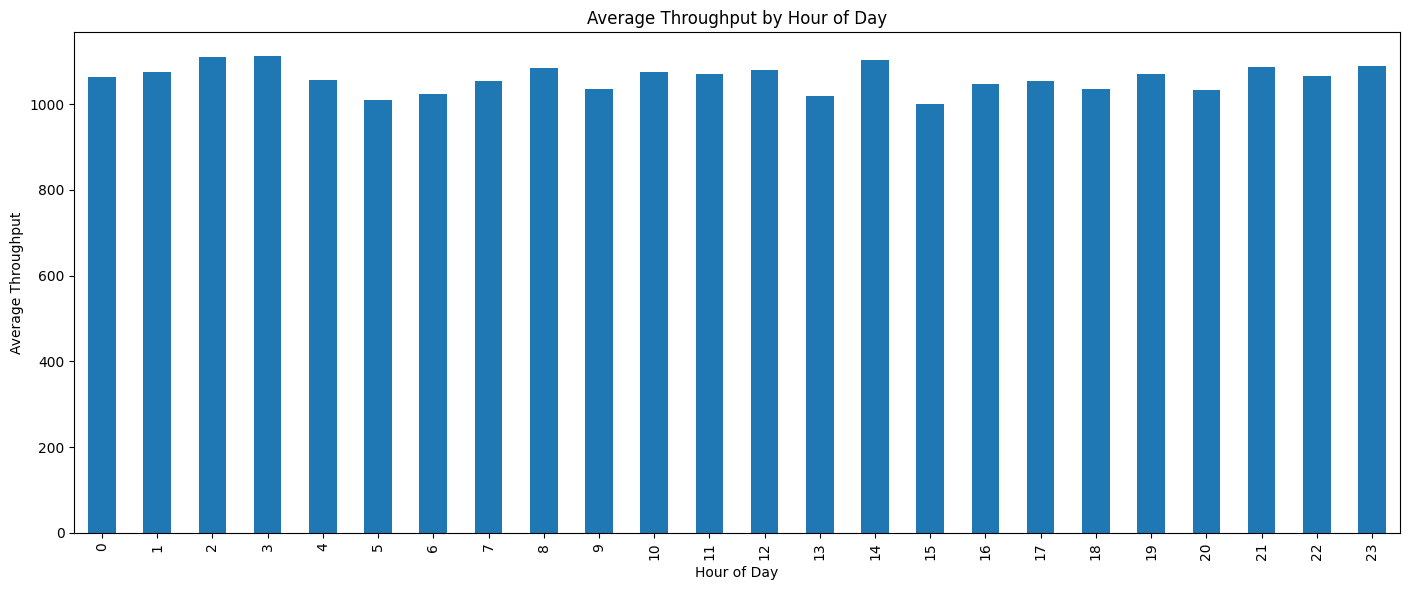

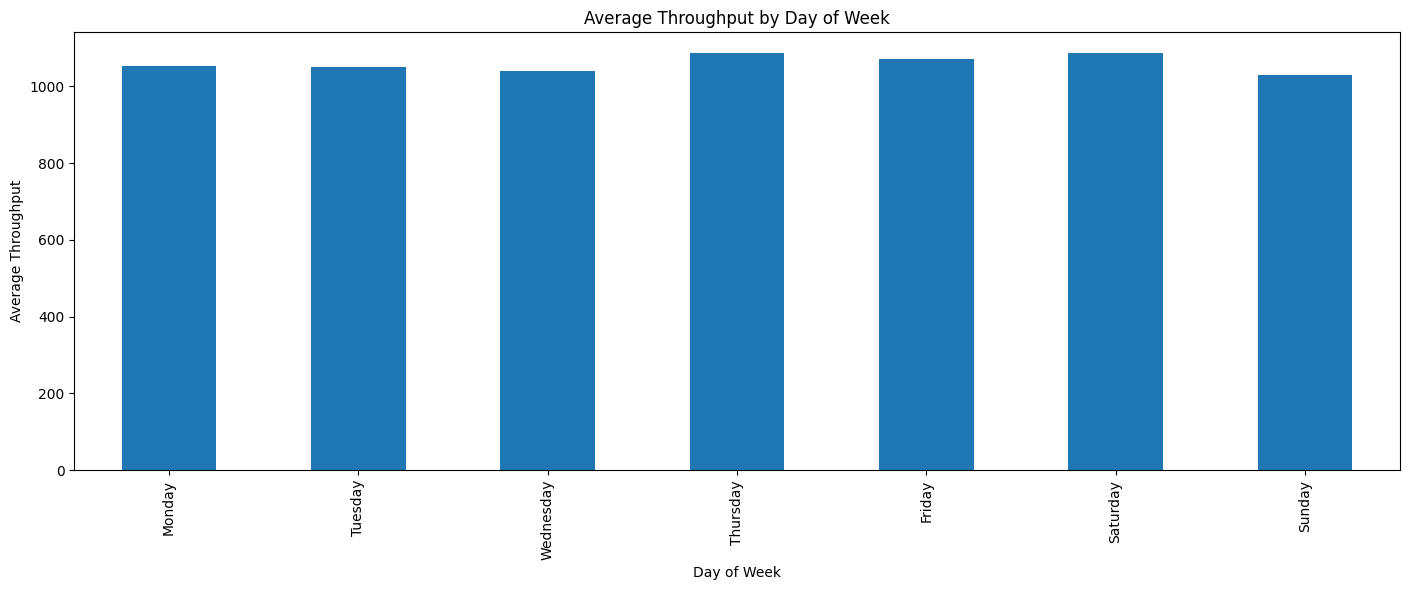

In [21]:
# 1.graph throughput over the years
df.throughput.plot(title = "Throughput over years", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('throughtput')
plt.show()


# 2. Throughput over years (yearly average)
plt.figure(figsize=(14, 6))
yearly_throughput = df.groupby(df.index.year)['throughput'].mean()
yearly_throughput.plot(title="Average Throughput by Year")
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Average Throughput')
plt.show()

# 3. Throughput by weeks in month
plt.figure(figsize=(14, 6))
# Create week of month
df['week_of_month'] = df.index.day.map(lambda d: (d-1)//7 + 1)
weekly_throughput = df.groupby(['month', 'week_of_month'])['throughput'].mean().unstack()
weekly_throughput.plot(title="Average Throughput by Week of Month", 
                      marker='o')
plt.legend(title='Week of Month', labels=['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'])
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Average Throughput')
plt.show()

# 4. Additional useful visualization: Daily pattern
plt.figure(figsize=(14, 6))
hourly_throughput = df.groupby(df.index.hour)['throughput'].mean()
hourly_throughput.plot(title="Average Throughput by Hour of Day", 
                      kind='bar')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.ylabel('Average Throughput')
plt.show()

# 5. Weekly pattern
plt.figure(figsize=(14, 6))
daily_throughput = df.groupby(df.index.dayofweek)['throughput'].mean()
daily_throughput.plot(title="Average Throughput by Day of Week", 
                     kind='bar')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.xlabel('Day of Week')
plt.ylabel('Average Throughput')
plt.show()

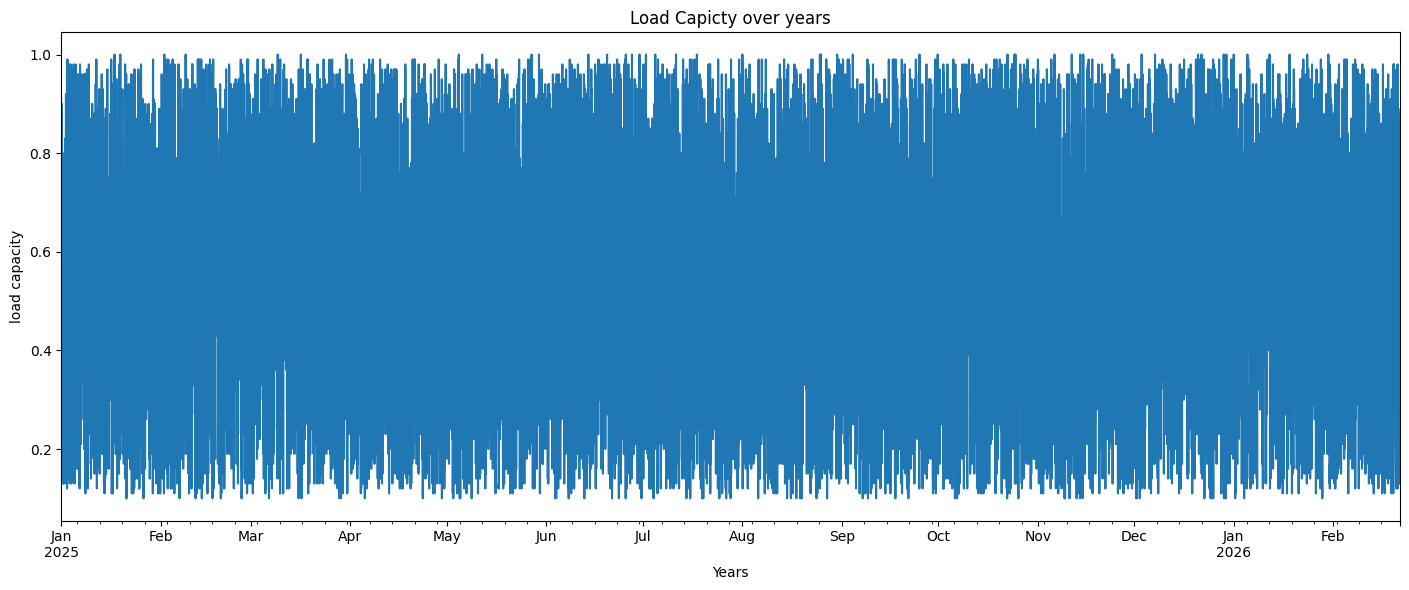

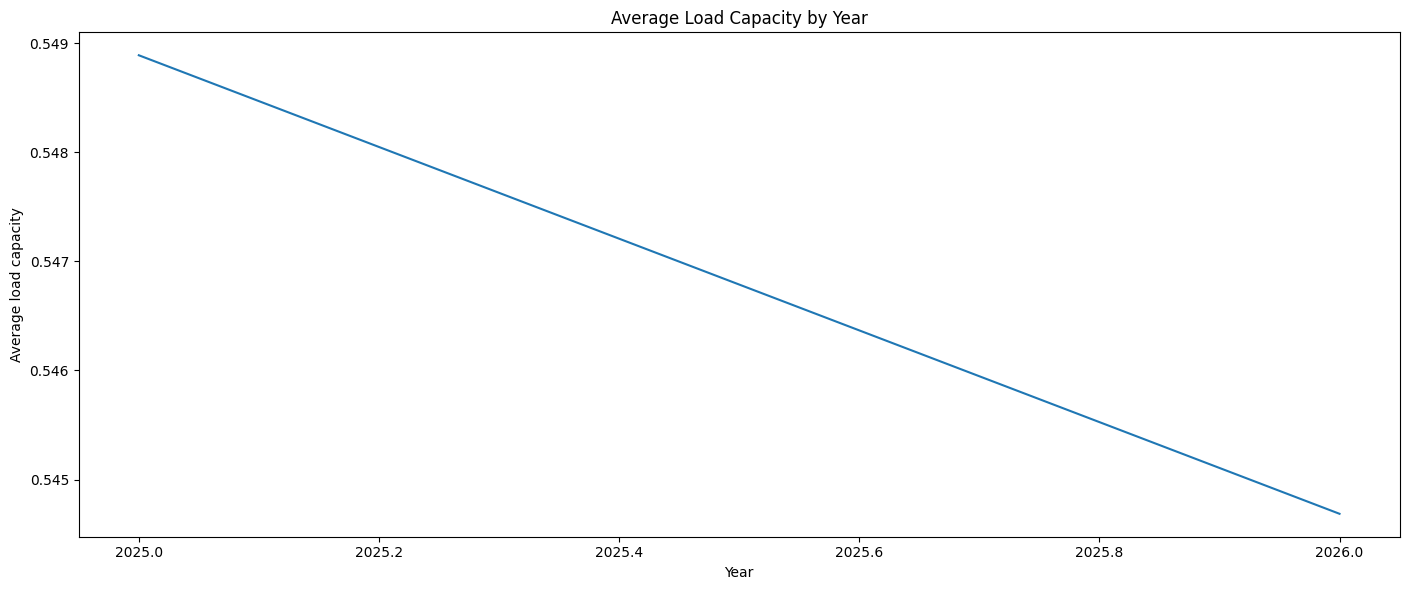

<Figure size 1400x600 with 0 Axes>

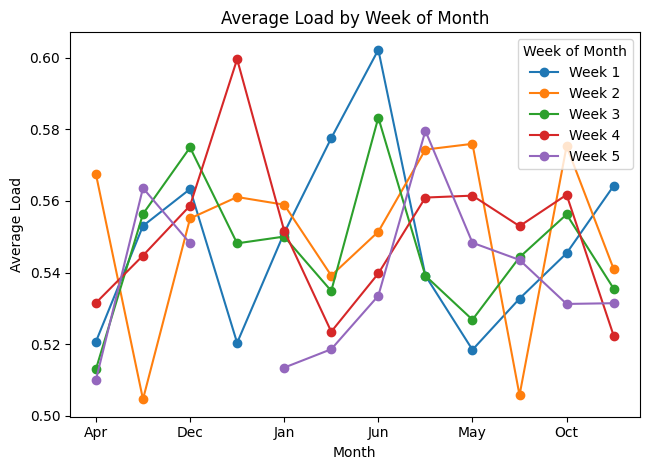

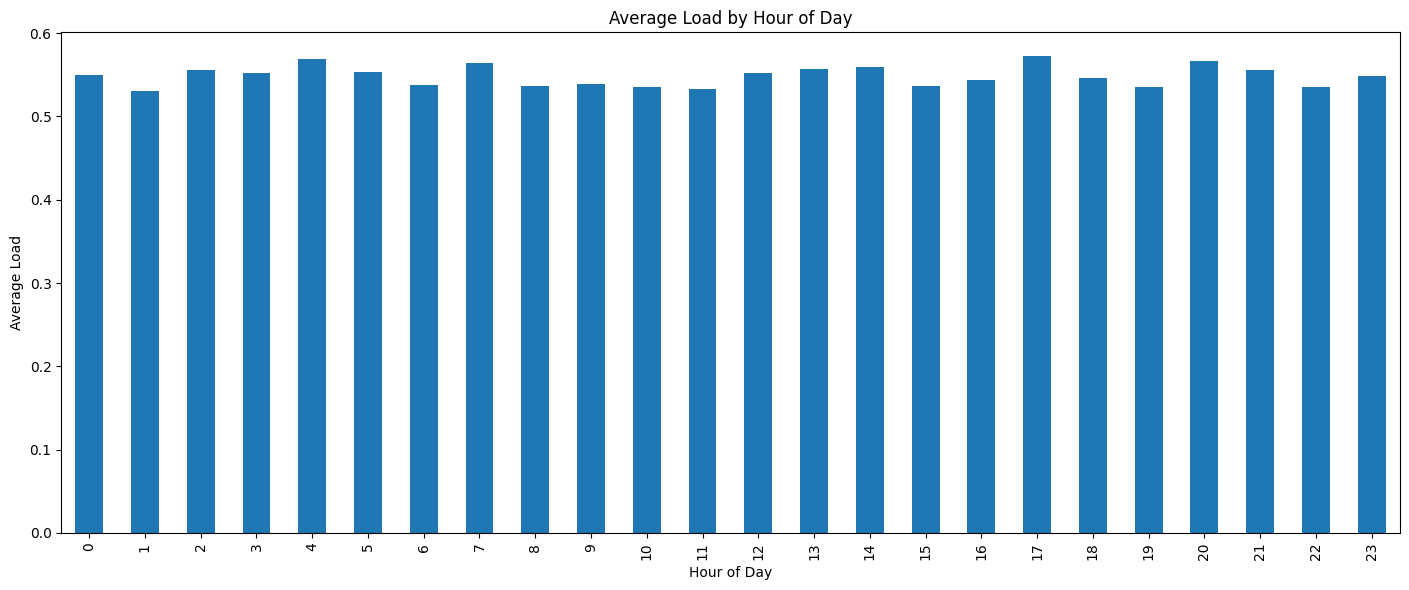

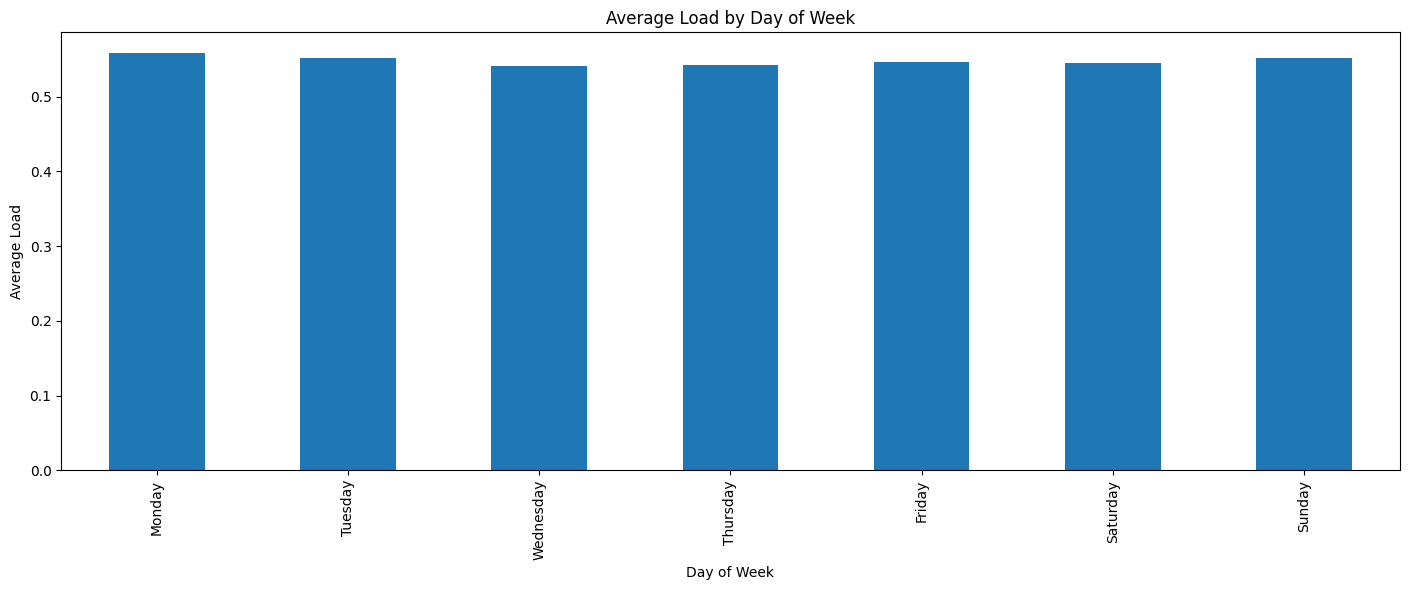

In [22]:
# 1.graph load over the years
df.load_capacity.plot(title = "Load Capicty over years", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('load capacity')
plt.show()


# 2. Throughput over years (yearly average)
plt.figure(figsize=(14, 6))
yearly_load = df.groupby(df.index.year)['load_capacity'].mean()
yearly_load.plot(title="Average Load Capacity by Year")
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Average load capacity')
plt.show()

# 3. Throughput by weeks in month
plt.figure(figsize=(14, 6))
# Create week of month
df['week_of_month'] = df.index.day.map(lambda d: (d-1)//7 + 1)
weekly_load = df.groupby(['month', 'week_of_month'])['load_capacity'].mean().unstack()
weekly_load.plot(title="Average Load by Week of Month", 
                      marker='o')
plt.legend(title='Week of Month', labels=['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'])
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Average Load')
plt.show()

# 4. Additional useful visualization: Daily pattern
plt.figure(figsize=(14, 6))
hourly_load = df.groupby(df.index.hour)['load_capacity'].mean()
hourly_load.plot(title="Average Load by Hour of Day", 
                      kind='bar')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.ylabel('Average Load')
plt.show()

# 5. Weekly pattern
plt.figure(figsize=(14, 6))
daily_load = df.groupby(df.index.dayofweek)['load_capacity'].mean()
daily_load.plot(title="Average Load by Day of Week", 
                     kind='bar')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.xlabel('Day of Week')
plt.ylabel('Average Load')
plt.show()

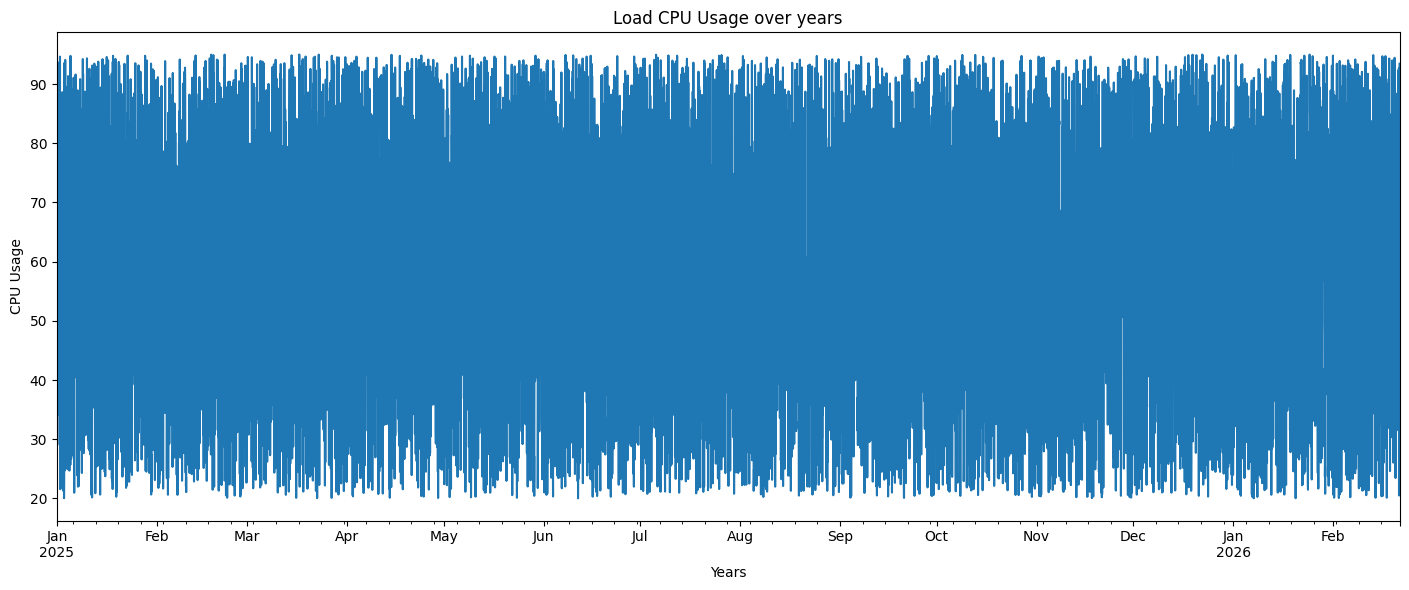

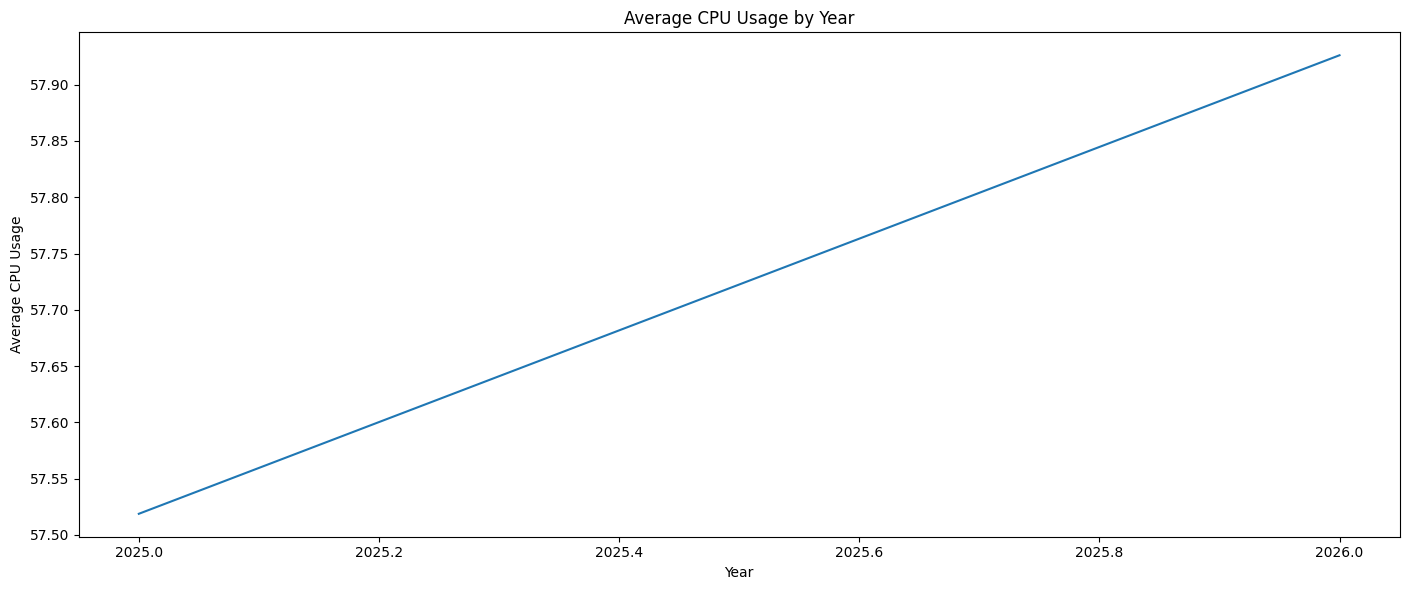

<Figure size 1400x600 with 0 Axes>

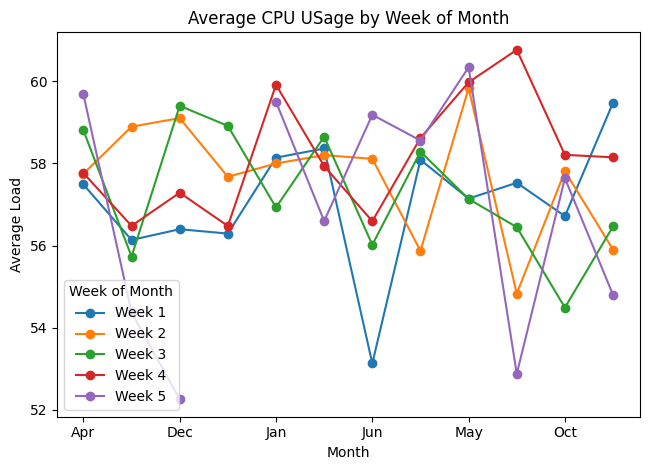

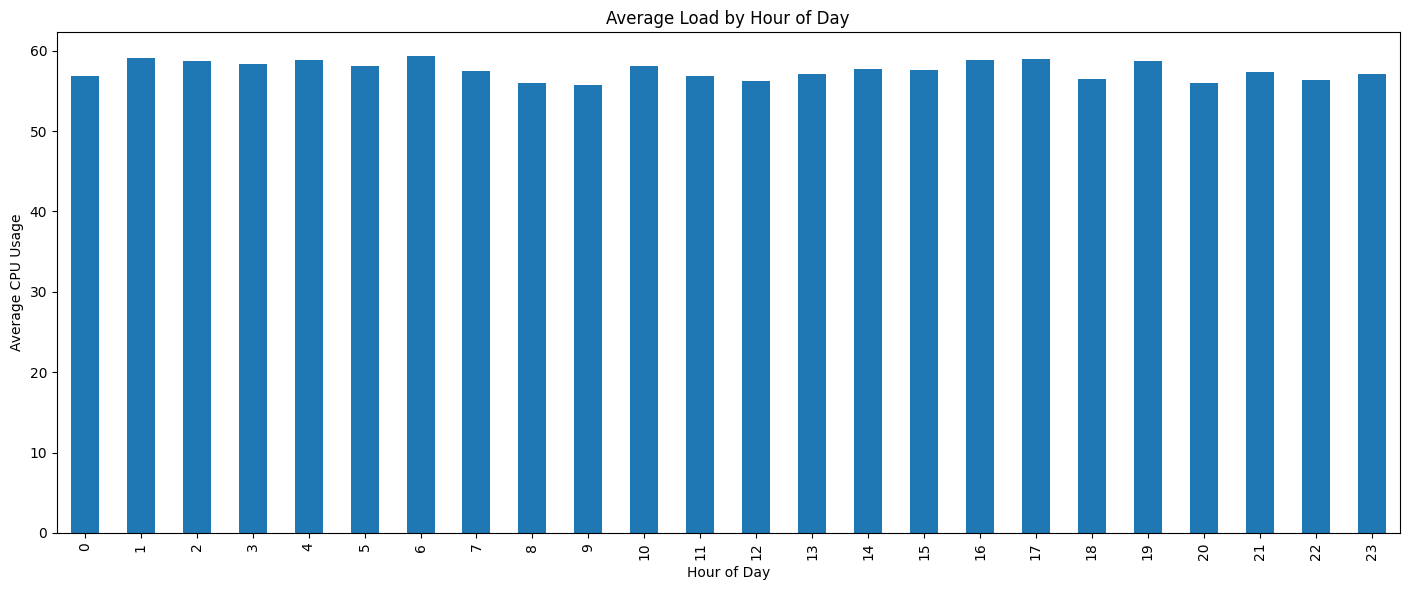

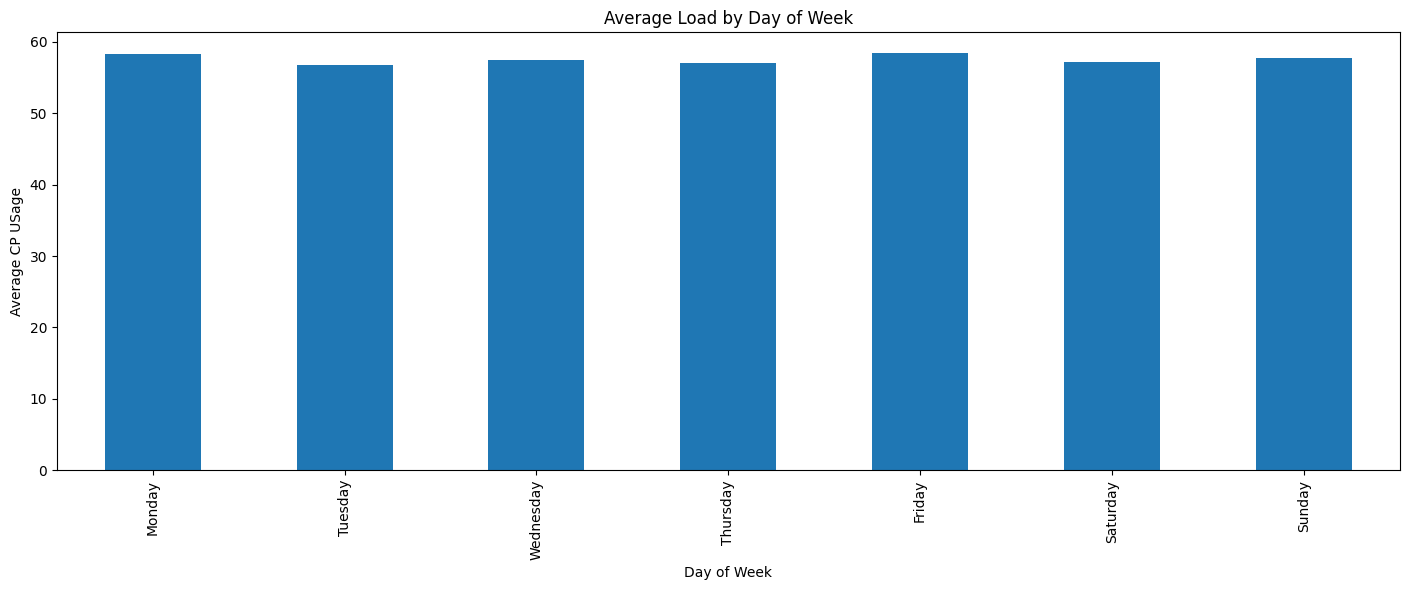

In [23]:
# 1.graph CPU Usage over the years
df.cpu_usage.plot(title = "Load CPU Usage over years", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('CPU Usage')
plt.show()


# 2. Throughput over years (yearly average)
plt.figure(figsize=(14, 6))
yearly_load = df.groupby(df.index.year)['cpu_usage'].mean()
yearly_load.plot(title="Average CPU Usage by Year")
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Average CPU Usage')
plt.show()

# 3. Throughput by weeks in month
plt.figure(figsize=(14, 6))
# Create week of month
df['week_of_month'] = df.index.day.map(lambda d: (d-1)//7 + 1)
weekly_load = df.groupby(['month', 'week_of_month'])['cpu_usage'].mean().unstack()
weekly_load.plot(title="Average CPU USage by Week of Month", 
                      marker='o')
plt.legend(title='Week of Month', labels=['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'])
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Average Load')
plt.show()

# 4. Additional useful visualization: Daily pattern
plt.figure(figsize=(14, 6))
hourly_load = df.groupby(df.index.hour)['cpu_usage'].mean()
hourly_load.plot(title="Average Load by Hour of Day", 
                      kind='bar')
plt.tight_layout()
plt.xlabel('Hour of Day')
plt.ylabel('Average CPU Usage')
plt.show()

# 5. Weekly pattern
plt.figure(figsize=(14, 6))
daily_throughput = df.groupby(df.index.dayofweek)['cpu_usage'].mean()
daily_throughput.plot(title="Average Load by Day of Week", 
                     kind='bar')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.xlabel('Day of Week')
plt.ylabel('Average CP USage')
plt.show()


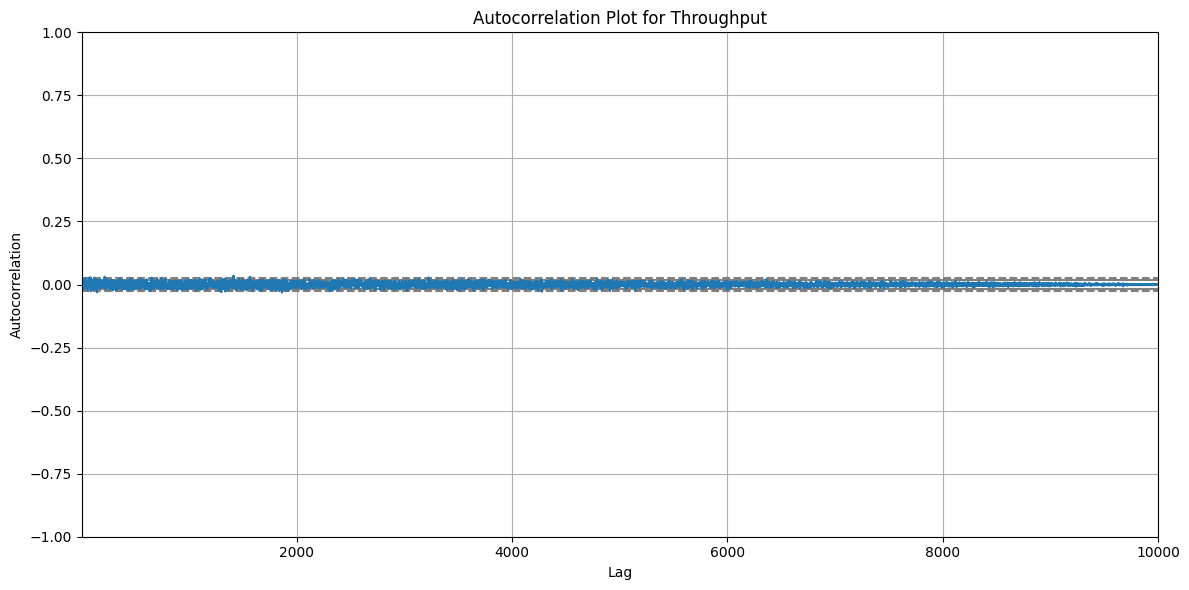

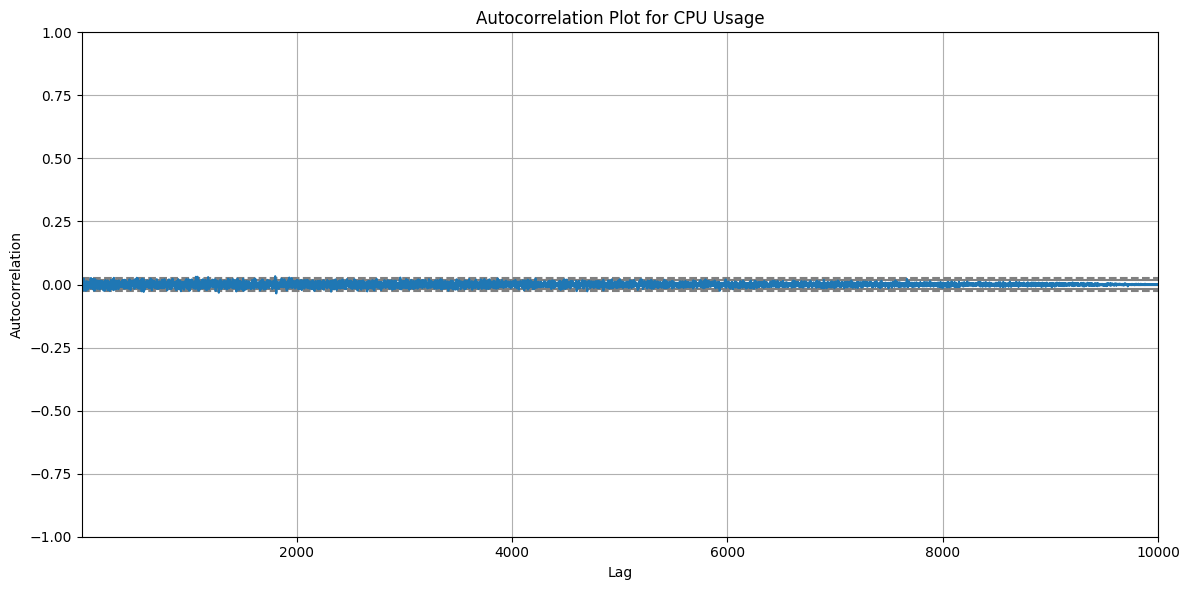

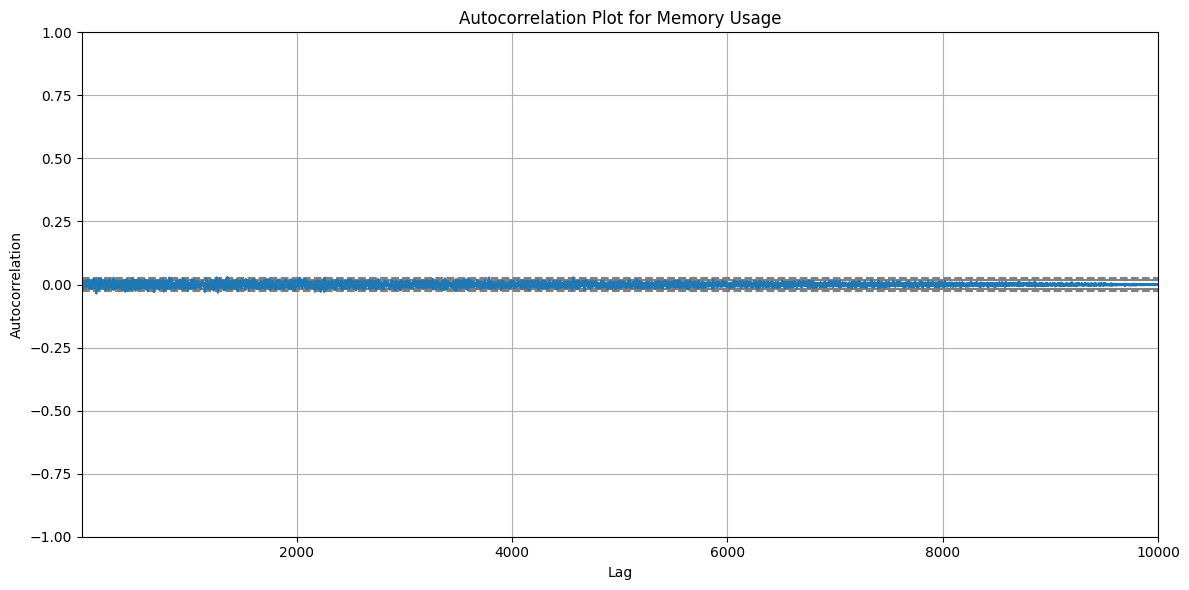

In [24]:
# Plot the autocorrelation for throughput
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['throughput'])
plt.title('Autocorrelation Plot for Throughput')
plt.tight_layout()
plt.show()

# You can also analyze autocorrelation for other metrics
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['cpu_usage'])
plt.title('Autocorrelation Plot for CPU Usage')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
autocorrelation_plot(df['memory_usage'])
plt.title('Autocorrelation Plot for Memory Usage')
plt.tight_layout()
plt.show()

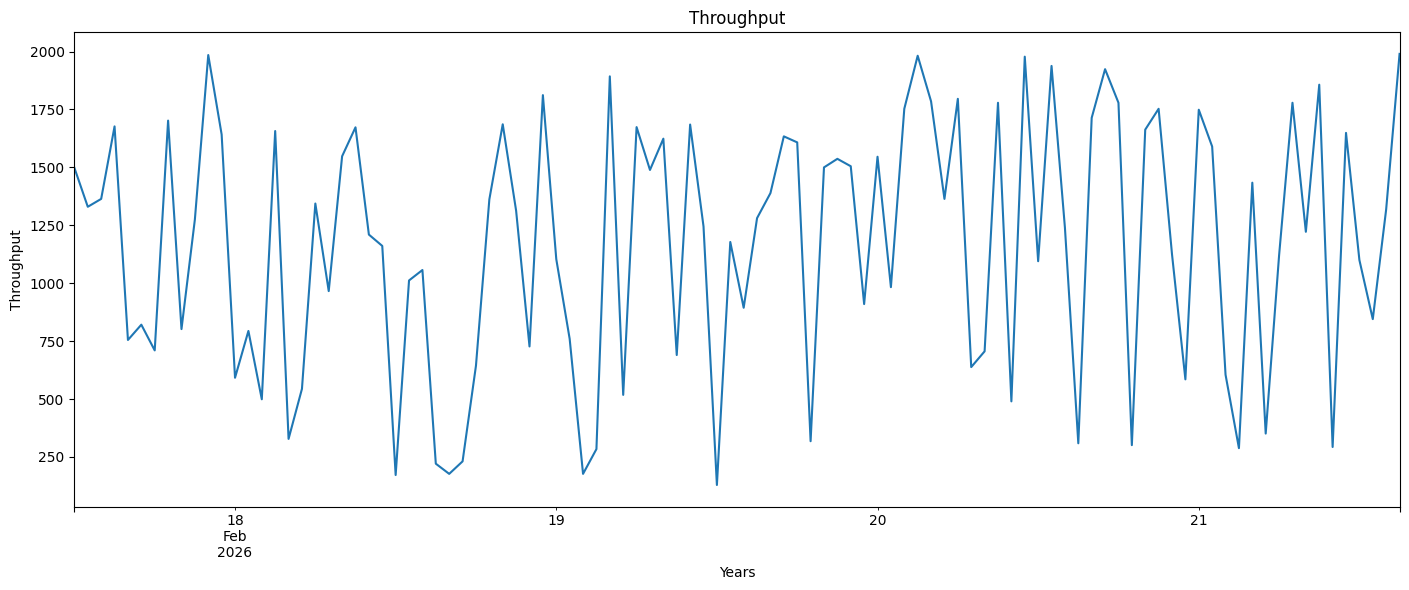

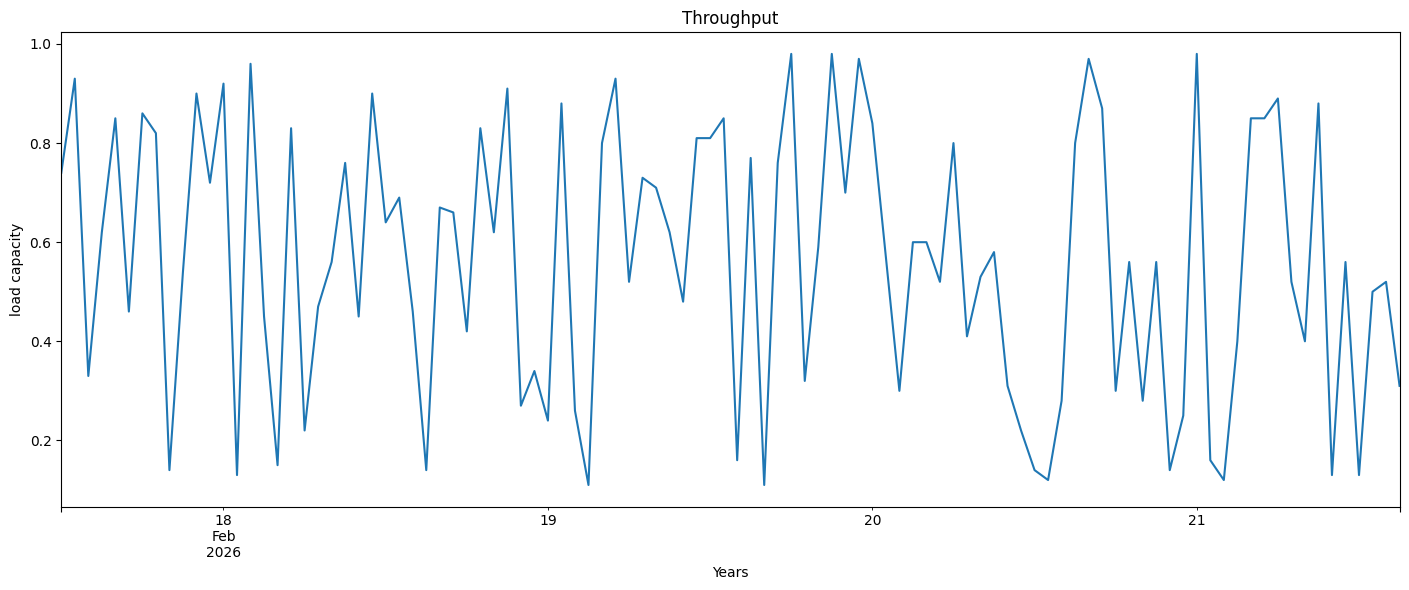

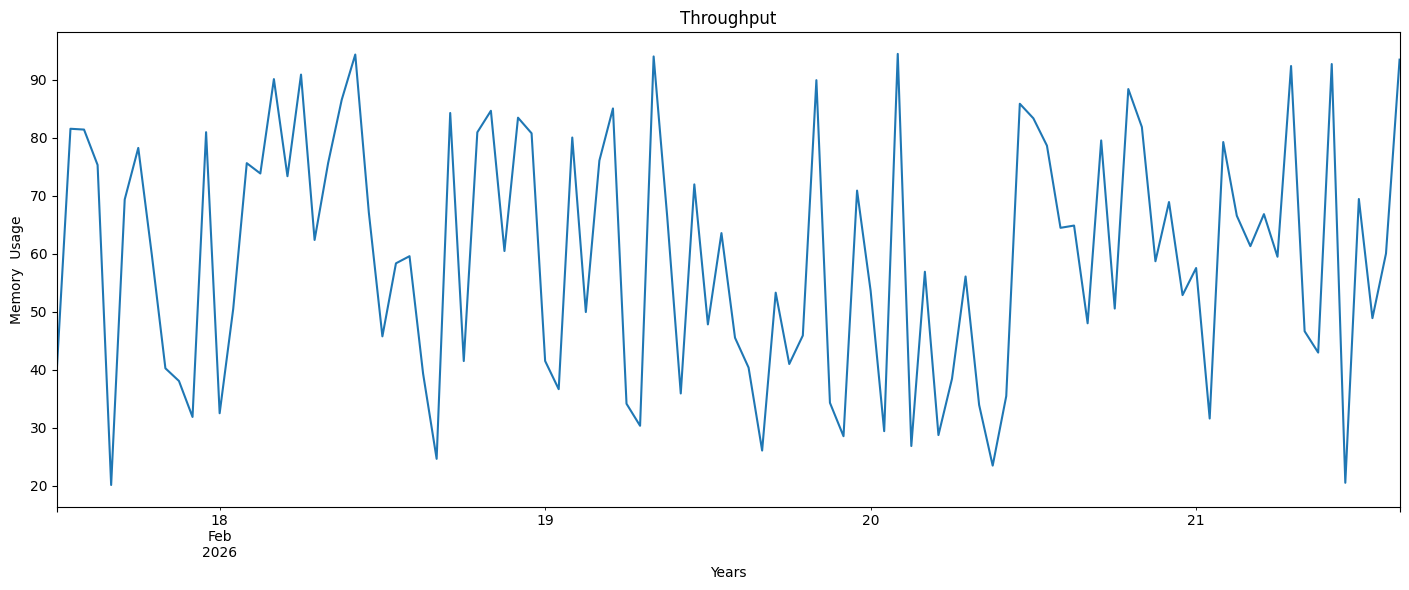

In [25]:
# let's look at the past 200 days to possibly adjust our data to this period
df.throughput.iloc[-100:].plot(title = "Throughput", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Throughput')
plt.show()

# let's look at the past 200 days to possibly adjust our data to this period
df.load_capacity.iloc[-100:].plot(title = "Throughput", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('load capacity')
plt.show()

# let's look at the past 200 days to possibly adjust our data to this period
df.cpu_usage.iloc[-100:].plot(title = "Throughput", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Memory  Usage')
plt.show()

Arima Model - Autoregressive Integrated Moving Average 
--is a statistical model for analyzing and forecasting time series data


Processing throughput

Stationarity Check for throughput
ADF Statistic: -25.073829412115472
p-value: 0.0
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


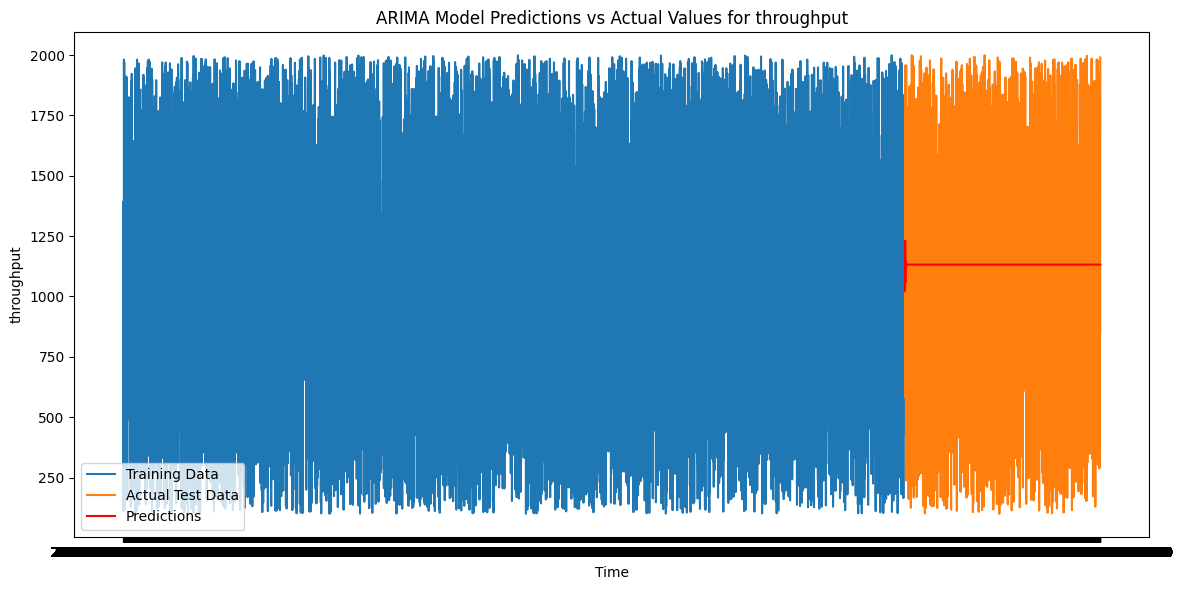


Model Performance Metrics for throughput:
Mean Squared Error: 297980.03
Root Mean Squared Error: 545.88
Mean Absolute Error: 468.41

Processing cpu_usage

Stationarity Check for cpu_usage
ADF Statistic: -90.00318118956118
p-value: 0.0
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


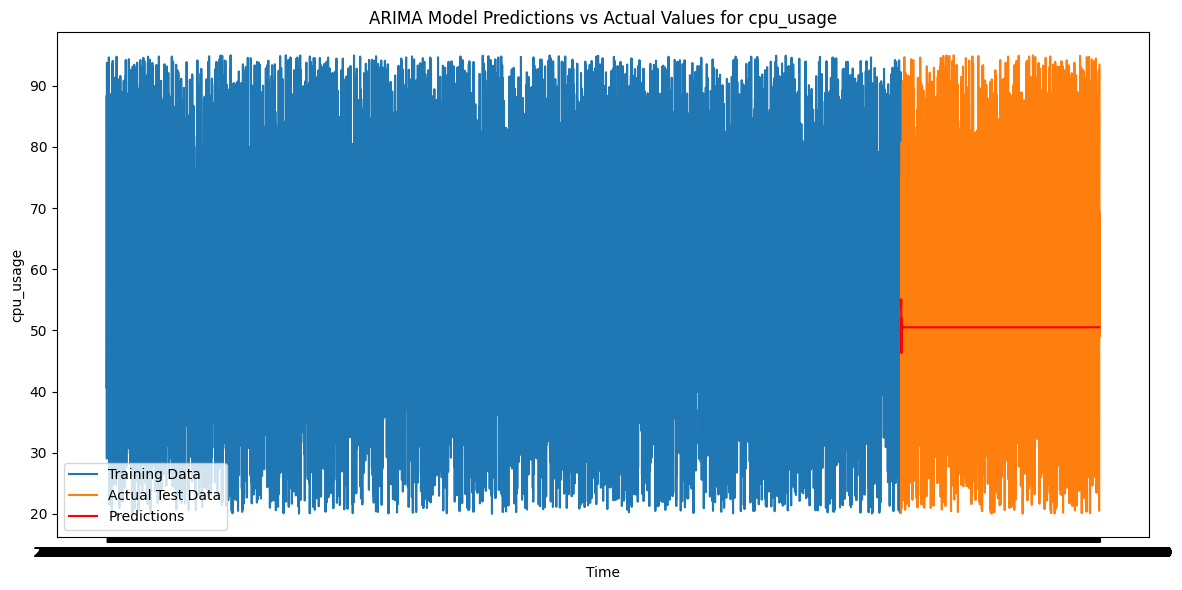


Model Performance Metrics for cpu_usage:
Mean Squared Error: 527.33
Root Mean Squared Error: 22.96
Mean Absolute Error: 19.62

Processing memory_usage

Stationarity Check for memory_usage
ADF Statistic: -90.3029509418783
p-value: 0.0
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


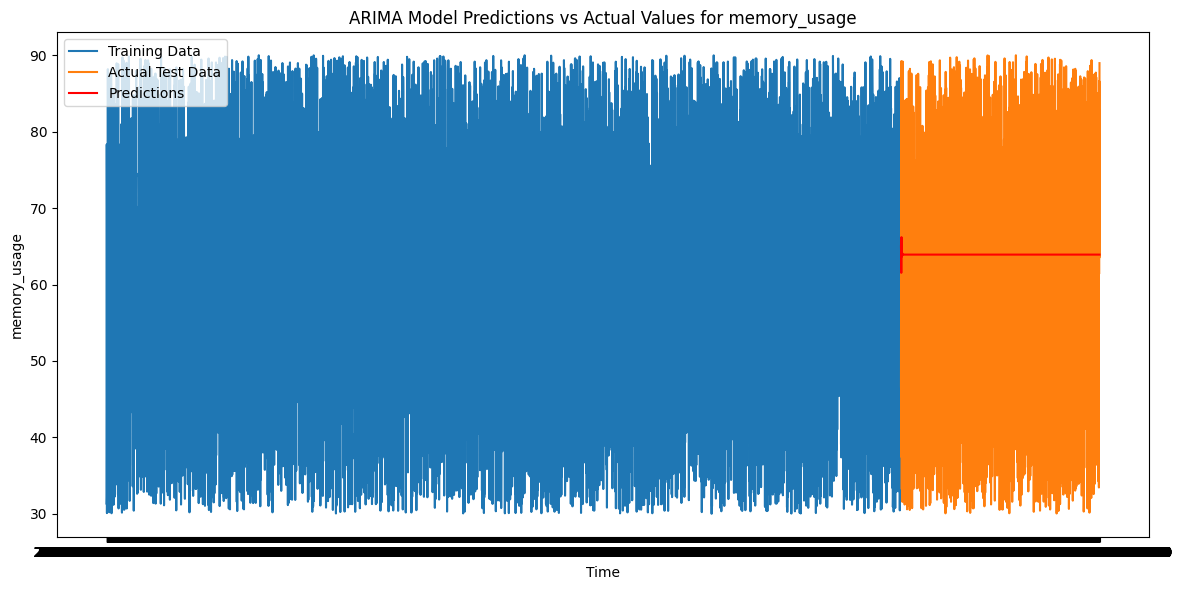


Model Performance Metrics for memory_usage:
Mean Squared Error: 317.25
Root Mean Squared Error: 17.81
Mean Absolute Error: 15.26

Processing load_capacity

Stationarity Check for load_capacity
ADF Statistic: -32.46244962098275
p-value: 0.0
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
An error occurred while processing load_capacity: ufunc 'subtract' cannot use operands with types dtype('<m8[ns]') and dtype('O')


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


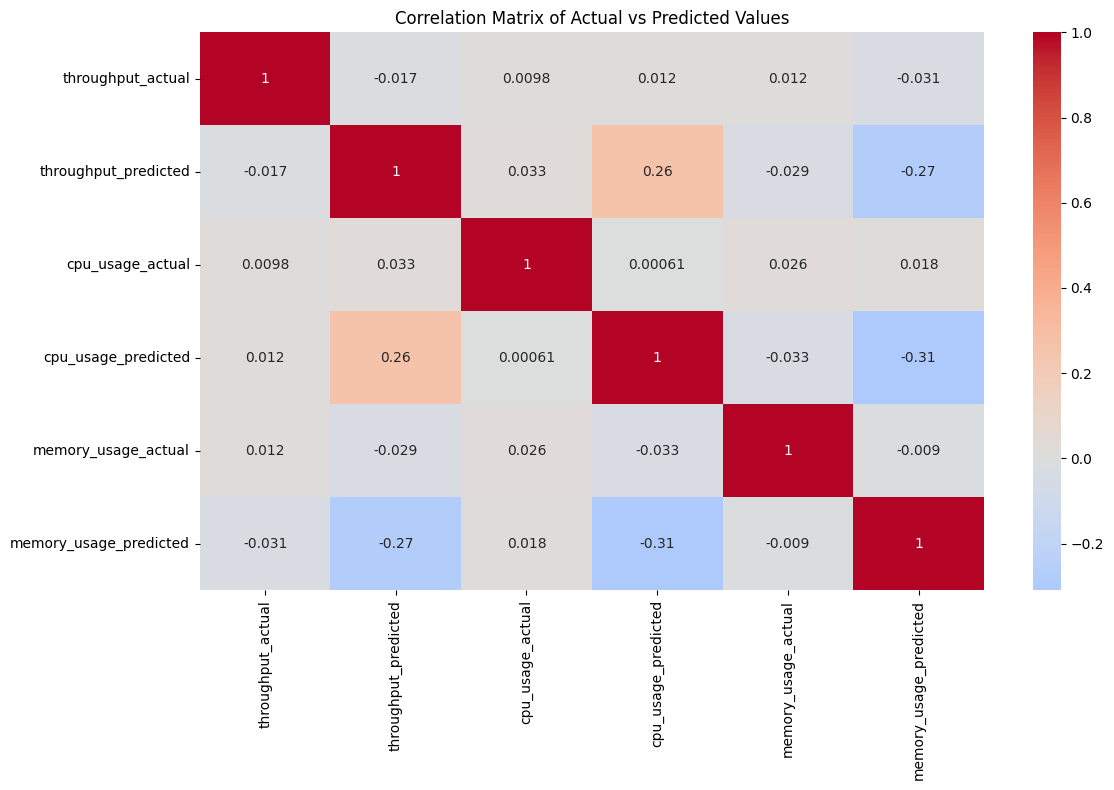


Summary of Model Performance:

throughput:
RMSE: 545.88
MAE: 468.41

cpu_usage:
RMSE: 22.96
MAE: 19.62

memory_usage:
RMSE: 17.81
MAE: 15.26


In [9]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd

# Define the parameters we want to analyze
parameters = ['throughput', 'cpu_usage', 'memory_usage', 'load_capacity']

# Function to check stationarity
def check_stationarity(timeseries, param_name):
    print(f"\nStationarity Check for {param_name}")
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Function to train and evaluate ARIMA model
def train_evaluate_arima(train_data, test_data, param_name):
    try:
        # Create and fit the ARIMA model
        # ARIMA model components explanation
            # p = 5  # AR (Autoregressive) order
            # d = 1  # I (Integration/Differencing) order
            # q = 0  # MA (Moving Average) order

        model = ARIMA(train_data, order=(5,1,0))
        model_fit = model.fit()
        
        # Make predictions
        predictions = model_fit.forecast(steps=len(test_data))
        
        # Plot the results
        plt.figure(figsize=(12,6))
        plt.plot(train_data.index, train_data, label='Training Data')
        plt.plot(test_data.index, test_data, label='Actual Test Data')
        plt.plot(test_data.index, predictions, label='Predictions', color='red')
        plt.title(f'ARIMA Model Predictions vs Actual Values for {param_name}')
        plt.xlabel('Time')
        plt.ylabel(param_name)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Calculate error metrics
        mse = mean_squared_error(test_data, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_data, predictions)
        
        print(f"\nModel Performance Metrics for {param_name}:")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        
        return predictions, model_fit
        
    except Exception as e:
        print(f"An error occurred while processing {param_name}: {str(e)}")
        return None, None

# Prepare training and test sets for each parameter
train_size = int(len(df) * 0.8)
results = {}

for param in parameters:
    print(f"\n{'='*50}")
    print(f"Processing {param}")
    print('='*50)
    
    # Split data
    train = df[param][:train_size]
    test = df[param][train_size:]
    
    # Check stationarity
    check_stationarity(train, param)
    
    # Train and evaluate model
    predictions, model = train_evaluate_arima(train, test, param)
    
    if predictions is not None:
        results[param] = {
            'predictions': predictions,
            'model': model,
            'actual_test': test
            
        }

# Create correlation matrix of predictions
pred_df = pd.DataFrame()
for param in parameters:
    if param in results:
        pred_df[f'{param}_actual'] = results[param]['actual_test']
        pred_df[f'{param}_predicted'] = results[param]['predictions']

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pred_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Print summary of all models
print("\nSummary of Model Performance:")
print("="*50)
for param in parameters:
    if param in results:
        actual = results[param]['actual_test']
        pred = results[param]['predictions']
        mse = mean_squared_error(actual, pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual, pred)
        
        print(f"\n{param}:")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")

NameError: name 'df' is not defined

#Predicticting Peak hour for June 2025

Peak Threshold: 1445.30


d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\GenAI-Projects\PeakHourPredctiveAnalysis\venv_py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


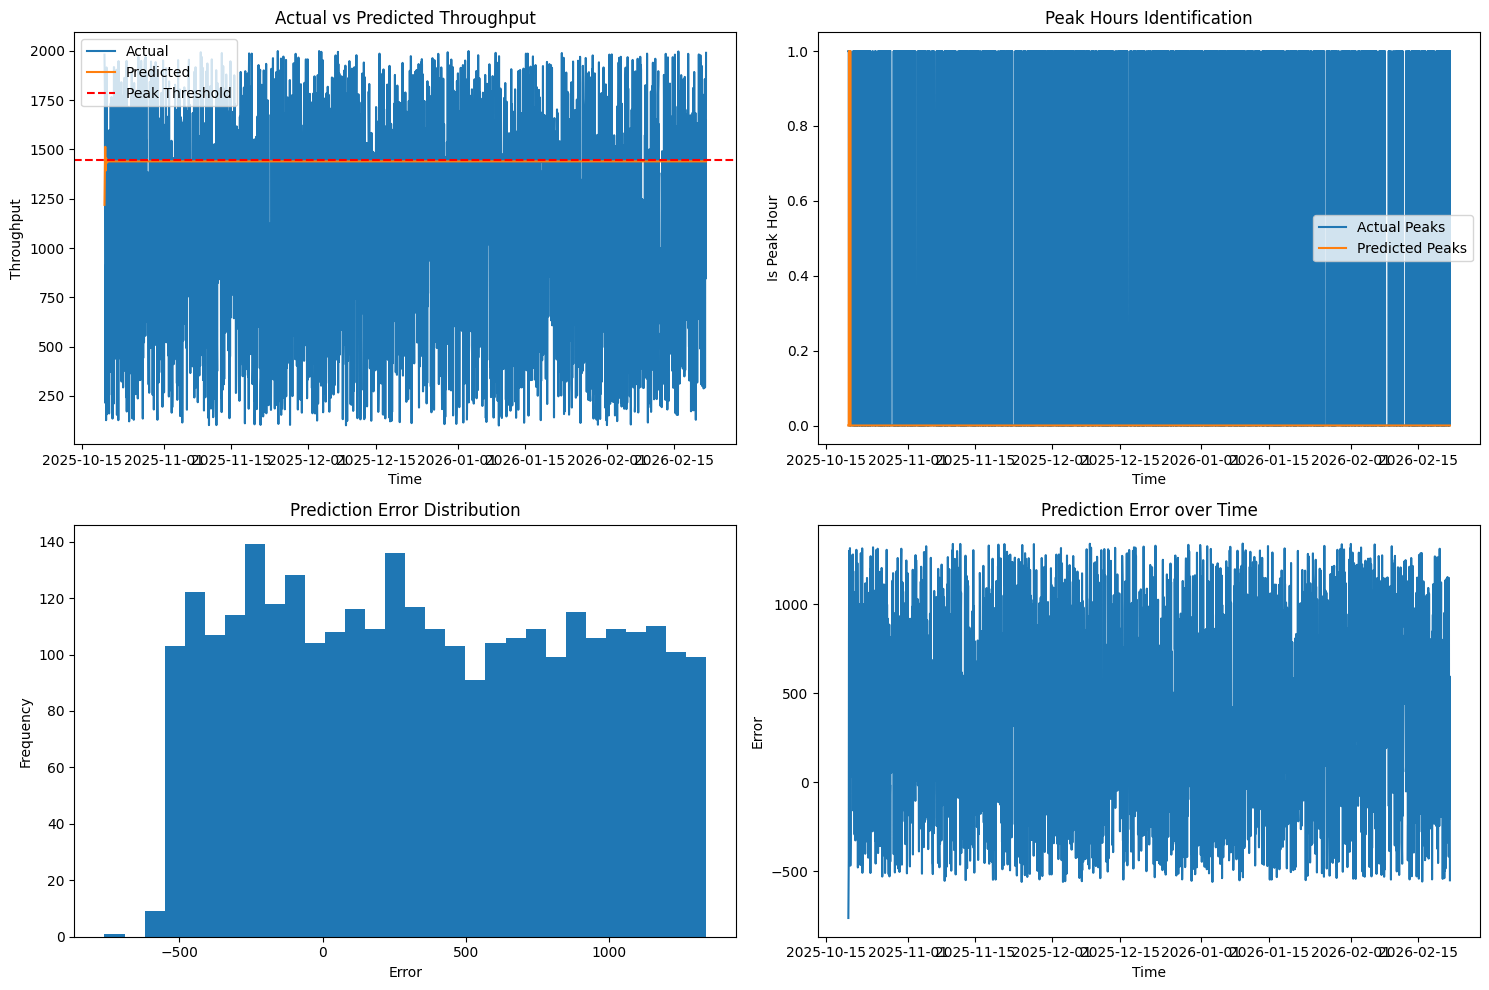


Prediction Summary Statistics:
-----------------------------
RMSE: 658.64
MAE: 539.31

Peak Hour Prediction Accuracy: 69.10%
Actual Peak Hours: 924
Predicted Peak Hours: 5

Last 10 Predictions vs Actual Values:
-------------------------------------
            Timestamp  Actual_Throughput  Predicted_Throughput  \
0 2026-02-21 06:00:00               1120               1439.54   
1 2026-02-21 07:00:00               1779               1439.54   
2 2026-02-21 08:00:00               1222               1439.54   
3 2026-02-21 09:00:00               1857               1439.54   
4 2026-02-21 10:00:00                293               1439.54   
5 2026-02-21 11:00:00               1649               1439.54   
6 2026-02-21 12:00:00               1100               1439.54   
7 2026-02-21 13:00:00                845               1439.54   
8 2026-02-21 14:00:00               1319               1439.54   
9 2026-02-21 15:00:00               1990               1439.54   

   Is_Peak_Actual  Is_P

ARIMA


Processing cpu_usage

Stationarity Check for cpu_usage
ADF Statistic: -90.00318118956118
p-value: 0.0
Used Lag: 0
Number of Observations: 7999
Critical values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


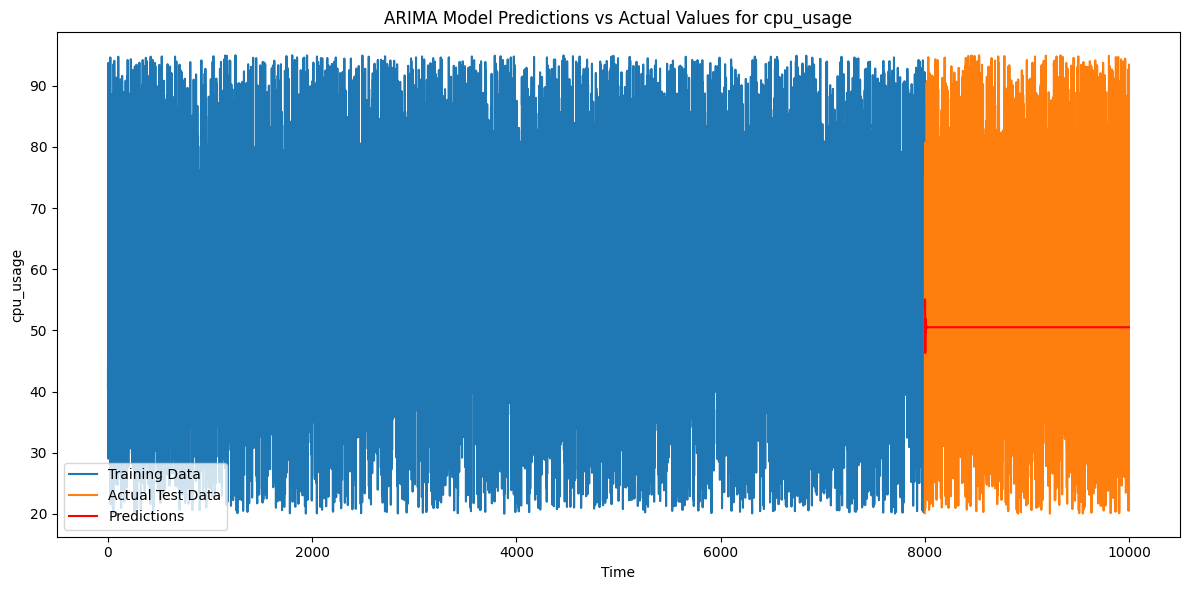


Model Performance Metrics for cpu_usage:
Mean Squared Error: 527.33
Root Mean Squared Error: 22.96
Mean Absolute Error: 19.62

Processing memory_usage

Stationarity Check for memory_usage
ADF Statistic: -90.3029509418783
p-value: 0.0
Used Lag: 0
Number of Observations: 7999
Critical values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


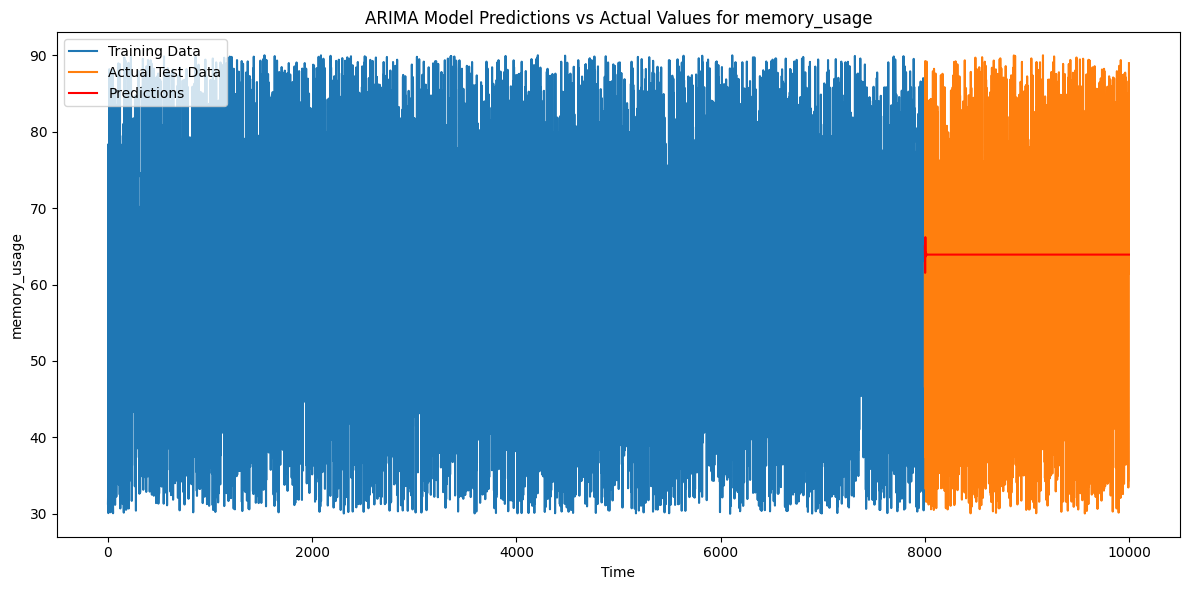


Model Performance Metrics for memory_usage:
Mean Squared Error: 317.25
Root Mean Squared Error: 17.81
Mean Absolute Error: 15.26

Processing load_capacity

Stationarity Check for load_capacity
ADF Statistic: -88.54697207993881
p-value: 0.0
Used Lag: 0
Number of Observations: 7999
Critical values:
	1%: -3.43
	5%: -2.86
	10%: -2.57


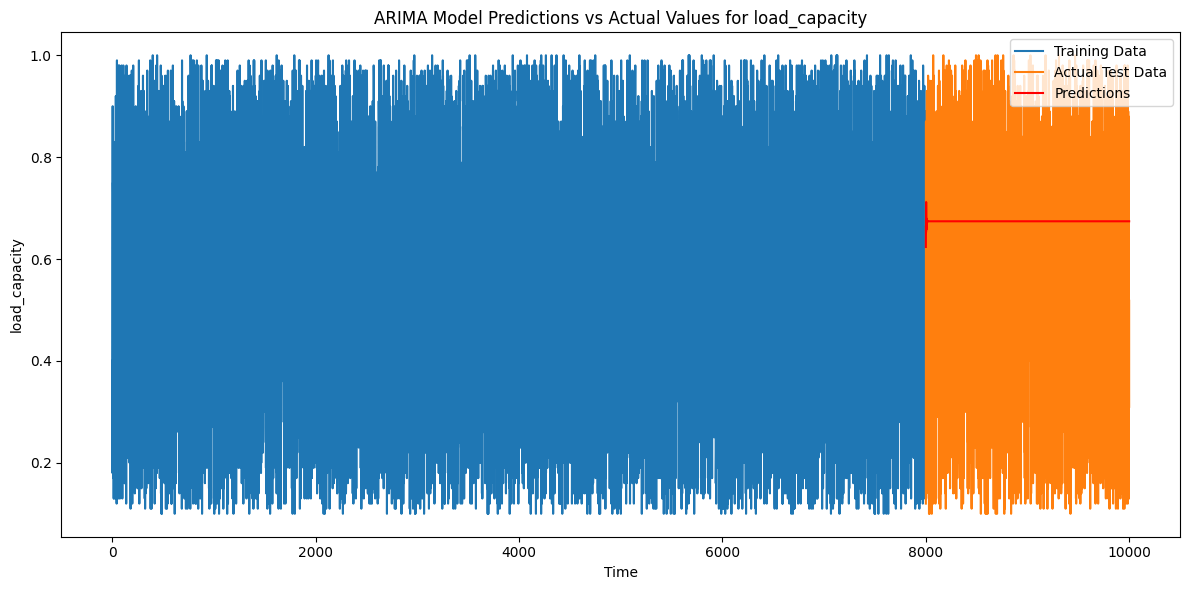


Model Performance Metrics for load_capacity:
Mean Squared Error: 0.08
Root Mean Squared Error: 0.29
Mean Absolute Error: 0.24


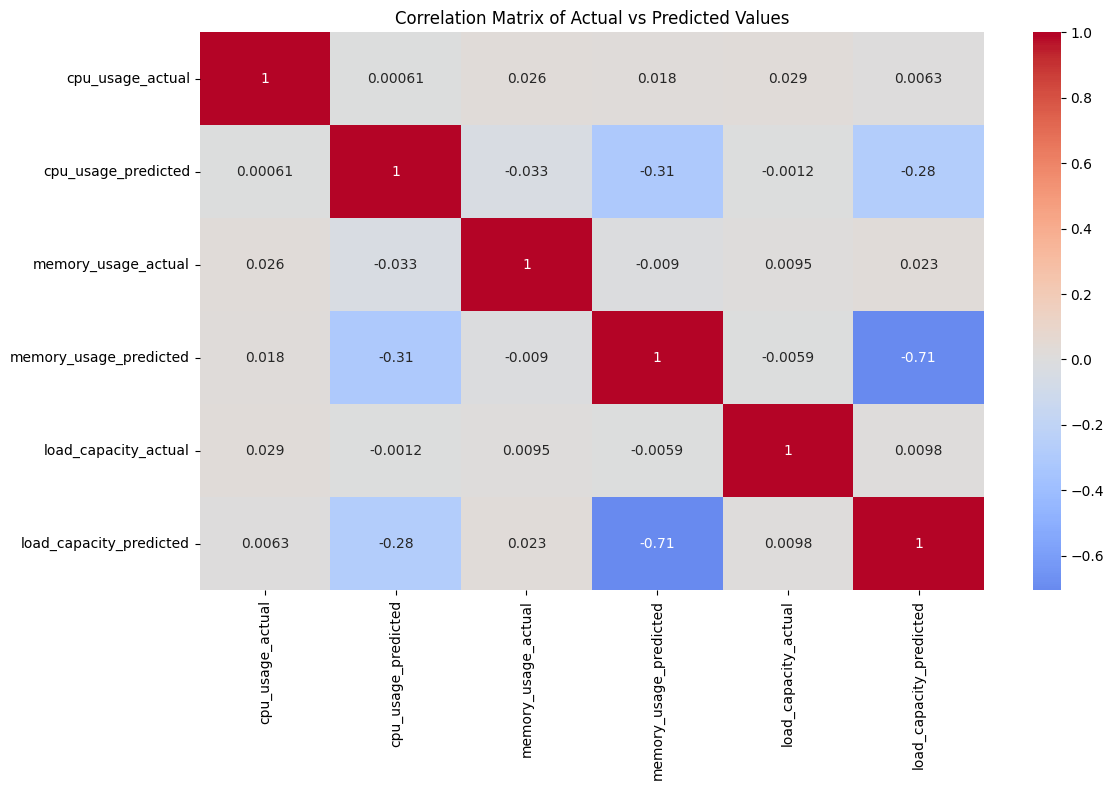


Summary of Model Performance:

cpu_usage:
RMSE: 22.96
MAE: 19.62

memory_usage:
RMSE: 17.81
MAE: 15.26

load_capacity:
RMSE: 0.29
MAE: 0.24


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your dataset into a DataFrame
df = pd.read_csv('metrics_data.csv')  # Replace with your actual file path

# Define the parameters we want to analyze
parameters = ['cpu_usage', 'memory_usage', 'load_capacity']

# Function to check stationarity
# Function to check stationarity
def check_stationarity(timeseries, param_name):
    print(f"\nStationarity Check for {param_name}")
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Used Lag:', result[2])
    print('Number of Observations:', result[3])
    print('Critical values:')
    
    critical_values = result[4]  # Accessing the critical values correctly
    for key, value in critical_values.items():
        print('\t%s: %.2f' % (key, value))

# Function to train and evaluate ARIMA model
def train_evaluate_arima(train_data, test_data, param_name):
    try:
        model = ARIMA(train_data, order=(5,1,0))
        model_fit = model.fit()
        
        # Make predictions
        predictions = model_fit.forecast(steps=len(test_data))
        
        # Plot the results
        plt.figure(figsize=(12,6))
        plt.plot(train_data.index, train_data, label='Training Data')
        plt.plot(test_data.index, test_data, label='Actual Test Data')
        plt.plot(test_data.index, predictions, label='Predictions', color='red')
        plt.title(f'ARIMA Model Predictions vs Actual Values for {param_name}')
        plt.xlabel('Time')
        plt.ylabel(param_name)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Calculate error metrics
        mse = mean_squared_error(test_data, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_data, predictions)
        
        print(f"\nModel Performance Metrics for {param_name}:")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        
        return predictions, model_fit
        
    except Exception as e:
        print(f"An error occurred while processing {param_name}: {str(e)}")
        return None, None

# Prepare training and test sets for each parameter
train_size = int(len(df) * 0.8)  # Now df is defined
results = {}

for param in parameters:
    print(f"\n{'='*50}")
    print(f"Processing {param}")
    print('='*50)
    
    # Split data
    train = df[param][:train_size]
    test = df[param][train_size:]
    
    # Check stationarity
    check_stationarity(train, param)
    
    # Train and evaluate model
    predictions, model = train_evaluate_arima(train, test, param)
    
    if predictions is not None:
        results[param] = {
            'predictions': predictions,
            'model': model,
            'actual_test': test
        }

# Create correlation matrix of predictions
pred_df = pd.DataFrame()
for param in parameters:
    if param in results:
        pred_df[f'{param}_actual'] = results[param]['actual_test']
        pred_df[f'{param}_predicted'] = results[param]['predictions']

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pred_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Print summary of all models
print("\nSummary of Model Performance:")
print("="*50)
for param in parameters:
    if param in results:
        actual = results[param]['actual_test']
        pred = results[param]['predictions']
        mse = mean_squared_error(actual, pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual, pred)
        
        print(f"\n{param}:")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")

LSTM


Training LSTM Model...
Epoch 1/50
9/9 [==============================] - 2s 30ms/step - loss: 0.2630 - val_loss: 0.2015
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.2274 - val_loss: 0.1683
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1893 - val_loss: 0.1341
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.1496 - val_loss: 0.1000
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1100 - val_loss: 0.0683
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0735 - val_loss: 0.0434
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0452 - val_loss: 0.0305
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0309 - val_loss: 0.0309
Epoch 9/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0282 - val_loss: 0.0343
Epoch 10/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0292 - val_loss: 0.0339
Epoch 11/50
9

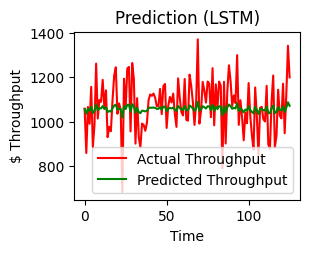

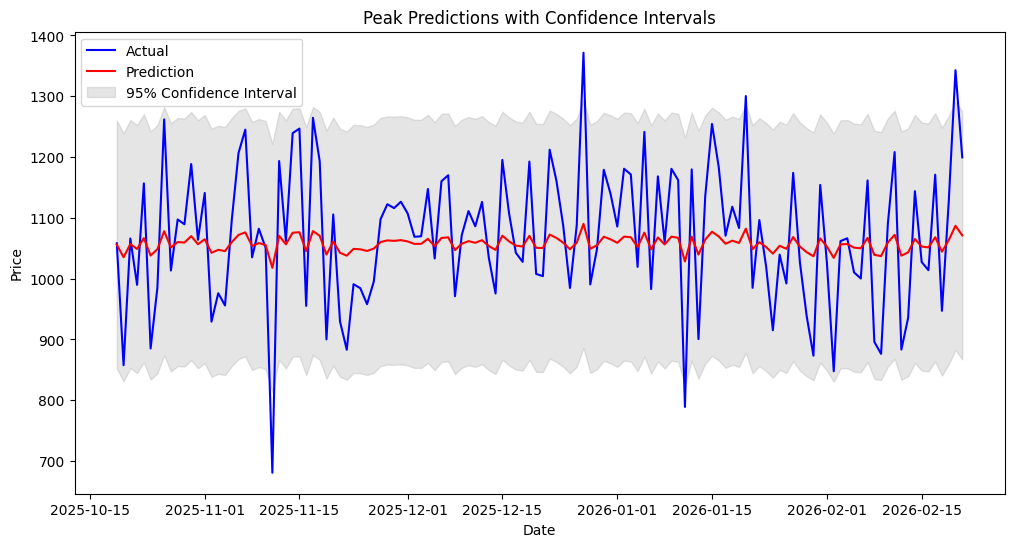

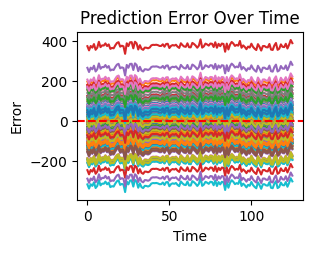

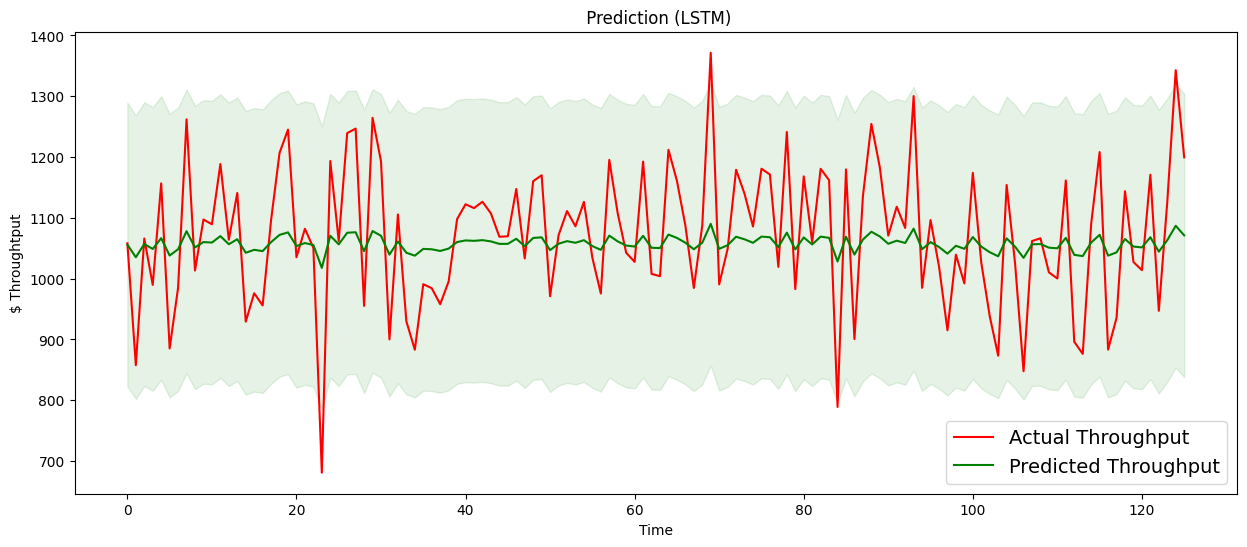


Prediction Summary Statistics:
--------------------
Mean Absolute Error: $93.89
Standard Deviation of Error: $116.54
Maximum Absolute Error: $409.25
Minimum Absolute Error: $0.01

Mean Absolute Percentage Error: 8.96%

Last 10 Predictions vs Actual Values:
-------------------------------------
        Date       Actual    Predicted  Difference
0 2026-02-12   883.333333  1037.820801  154.487467
1 2026-02-13   935.583333  1043.201660  107.618327
2 2026-02-14  1143.791667  1065.140503  -78.651164
3 2026-02-15  1027.333333  1052.770386   25.437052
4 2026-02-16  1013.916667  1051.361572   37.444906
5 2026-02-17  1170.916667  1068.058350 -102.858317
6 2026-02-18   947.083333  1044.392578   97.309245
7 2026-02-19  1126.083333  1063.243164  -62.840169
8 2026-02-20  1342.750000  1086.913818 -255.836182
9 2026-02-21  1199.437500  1071.141602 -128.295898

Model Summary:
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Sh

In [52]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from statsmodels.graphics.tsaplots import plot_acf

# Read and prepare data
# Load and prepare data
df = pd.read_csv('metrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df = df.resample('D').mean()
df = df.dropna()

# Split the data 70-30
LSTM_throughtput = df.throughput
X = LSTM_throughtput.values
X = LSTM_throughtput
dateLSTMX=LSTM_throughtput.index
size = int(len(X) * 0.7)
train_df, test_df = X[0:size], X[size:len(X)]

history = [x for x in train_df]
predictions = []

# Reshape and scale training data
training_values = train_df.values
training_values = np.reshape(training_values, (len(training_values), 1))

# Scale the data
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

# Prepare training data for LSTM
x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

# Create and compile LSTM model
model = Sequential([
    LSTM(50, input_shape=(None,1), activation="relu", return_sequences=True),
    LSTM(50, activation="relu"),
    Dense(25, activation="relu"),
    Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
print("\nTraining LSTM Model...")
history = model.fit(
    x_train, 
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Prepare test data
test_values = test_df.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))

# Make predictions
predicted_throughput = model.predict(test_values)
predicted_throughput = np.reshape(predicted_throughput, (len(predicted_throughput), 1))
predicted_throughput = scaler.inverse_transform(predicted_throughput)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_df.values, predicted_throughput))
print('\nTest RMSE: %.3f' % rmse)

# Plot 2: Throughput Predictions
plt.subplot(2, 2, 2)
plt.plot(test_df.values, color='red', label='Actual Throughput')
plt.plot(predicted_throughput, color='green', label='Predicted Throughput')
plt.title('Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('$ Throughput')
plt.legend()

# Calculate prediction intervals
confidence_intervals = pd.DataFrame(index=dateLSTMX[size:])
confidence_intervals['prediction'] = predicted_throughput
confidence_intervals['actual'] = test
confidence_intervals['error'] = confidence_intervals['prediction'] - confidence_intervals['actual']
confidence_intervals['std_error'] = confidence_intervals['error'].std()

# Plot predictions with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(confidence_intervals.index, confidence_intervals['actual'], label='Actual', color='blue')
plt.plot(confidence_intervals.index, confidence_intervals['prediction'], label='Prediction', color='red')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals['prediction'] - 1.96 * confidence_intervals['std_error'],
                 confidence_intervals['prediction'] + 1.96 * confidence_intervals['std_error'],
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('Peak Predictions with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot 3: Prediction Error
plt.subplot(2, 2, 3)
errors = predicted_throughput - test_df.values
plt.plot(errors)
plt.title('Prediction Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.axhline(y=0, color='r', linestyle='--')


# Additional analysis plot
plt.figure(figsize=(15, 6))
plt.plot(test_df.values, color='red', label='Actual Throughput')
plt.plot(predicted_throughput, color='green', label='Predicted Throughput')
plt.title(' Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('$ Throughtput')
plt.legend(loc=4, prop={'size': 14})

# Add confidence intervals
std_dev = np.std(errors)
plt.fill_between(
    range(len(predicted_throughput)),
    predicted_throughput.flatten() - 2*std_dev,
    predicted_throughput.flatten() + 2*std_dev,
    color='green',
    alpha=0.1,
    label='95% Confidence Interval'
)
plt.show()

# Print summary statistics
print("\nPrediction Summary Statistics:")
print("--------------------")
print(f"Mean Absolute Error: ${np.mean(np.abs(errors)):.2f}")
print(f"Standard Deviation of Error: ${np.std(errors):.2f}")
print(f"Maximum Absolute Error: ${np.max(np.abs(errors)):.2f}")
print(f"Minimum Absolute Error: ${np.min(np.abs(errors)):.2f}")

# Calculate MAPE
mape = np.mean(np.abs((test_df.values - predicted_throughput) / test_df.values)) * 100
print(f"\nMean Absolute Percentage Error: {mape:.2f}%")


# Show last 10 predictions
print("\nLast 10 Predictions vs Actual Values:")
print("-------------------------------------")
last_10_df = pd.DataFrame({
    'Date': test_df.index[-10:],
    'Actual': test_df.values[-10:].flatten(),
    'Predicted': predicted_throughput[-10:].flatten(),
    'Difference': predicted_throughput[-10:].flatten() - test_df.values[-10:].flatten()
})
print(last_10_df)

print("\nModel Summary:")
print(model.summary())




In [8]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from statsmodels.graphics.tsaplots import plot_acf

# Read and prepare data
# Load and prepare data
df = pd.read_csv('metrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df = df.resample('D').mean()
df = df.dropna()

# Split the data 70-30
LSTM_load_capacity = df.columns["load_capacity","is_holiday"] 

X = LSTM_load_capacity.values
X = LSTM_load_capacity
dateLSTMX=LSTM_load_capacity.index
size = int(len(X) * 0.7)
train_df, test_df = X[0:size], X[size:len(X)]

history = [x for x in train_df]
predictions = []

# Reshape and scale training data
training_values = train_df.values
training_values = np.reshape(training_values, (len(training_values), 1))

# Scale the data
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)

# Prepare training data for LSTM
x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

# Create and compile LSTM model
model = Sequential([
    LSTM(50, input_shape=(None,1), activation="relu", return_sequences=True),
    LSTM(50, activation="relu"),
    Dense(25, activation="relu"),
    Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
print("\nTraining LSTM Model...")
history = model.fit(
    x_train, 
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Prepare test data
test_values = test_df.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))

# Make predictions
predicted_throughput = model.predict(test_values)
predicted_throughput = np.reshape(predicted_throughput, (len(predicted_throughput), 1))
predicted_throughput = scaler.inverse_transform(predicted_throughput)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_df.values, predicted_throughput))
print('\nTest RMSE: %.3f' % rmse)

# Plot 2: Throughput Predictions
plt.subplot(2, 2, 2)
plt.plot(test_df.values, color='red', label='Actual Throughput')
plt.plot(predicted_throughput, color='green', label='Predicted Throughput')
plt.title('Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('$ Throughput')
plt.legend()

# Calculate prediction intervals
confidence_intervals = pd.DataFrame(index=dateLSTMX[size:])
confidence_intervals['prediction'] = predicted_throughput
confidence_intervals['actual'] = test
confidence_intervals['error'] = confidence_intervals['prediction'] - confidence_intervals['actual']
confidence_intervals['std_error'] = confidence_intervals['error'].std()

# Plot predictions with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(confidence_intervals.index, confidence_intervals['actual'], label='Actual', color='blue')
plt.plot(confidence_intervals.index, confidence_intervals['prediction'], label='Prediction', color='red')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals['prediction'] - 1.96 * confidence_intervals['std_error'],
                 confidence_intervals['prediction'] + 1.96 * confidence_intervals['std_error'],
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('Peak Predictions with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot 3: Prediction Error
plt.subplot(2, 2, 3)
errors = predicted_throughput - test_df.values
plt.plot(errors)
plt.title('Prediction Error Over Time')
plt.xlabel('Time')
plt.ylabel('Error')
plt.axhline(y=0, color='r', linestyle='--')


# Additional analysis plot
plt.figure(figsize=(15, 6))
plt.plot(test_df.values, color='red', label='Actual Throughput')
plt.plot(predicted_throughput, color='green', label='Predicted Throughput')
plt.title(' Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('$ Throughtput')
plt.legend(loc=4, prop={'size': 14})

# Add confidence intervals
std_dev = np.std(errors)
plt.fill_between(
    range(len(predicted_throughput)),
    predicted_throughput.flatten() - 2*std_dev,
    predicted_throughput.flatten() + 2*std_dev,
    color='green',
    alpha=0.1,
    label='95% Confidence Interval'
)
plt.show()

# Print summary statistics
print("\nPrediction Summary Statistics:")
print("--------------------")
print(f"Mean Absolute Error: ${np.mean(np.abs(errors)):.2f}")
print(f"Standard Deviation of Error: ${np.std(errors):.2f}")
print(f"Maximum Absolute Error: ${np.max(np.abs(errors)):.2f}")
print(f"Minimum Absolute Error: ${np.min(np.abs(errors)):.2f}")

# Calculate MAPE
mape = np.mean(np.abs((test_df.values - predicted_throughput) / test_df.values)) * 100
print(f"\nMean Absolute Percentage Error: {mape:.2f}%")


# Show last 10 predictions
print("\nLast 10 Predictions vs Actual Values:")
print("-------------------------------------")
last_10_df = pd.DataFrame({
    'Date': test_df.index[-10:],
    'Actual': test_df.values[-10:].flatten(),
    'Predicted': predicted_throughput[-10:].flatten(),
    'Difference': predicted_throughput[-10:].flatten() - test_df.values[-10:].flatten()
})
print(last_10_df)

print("\nModel Summary:")
print(model.summary())




TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

XGBOOST

[0]	validation_0-rmse:0.17130


[100]	validation_0-rmse:0.17003
[120]	validation_0-rmse:0.17042


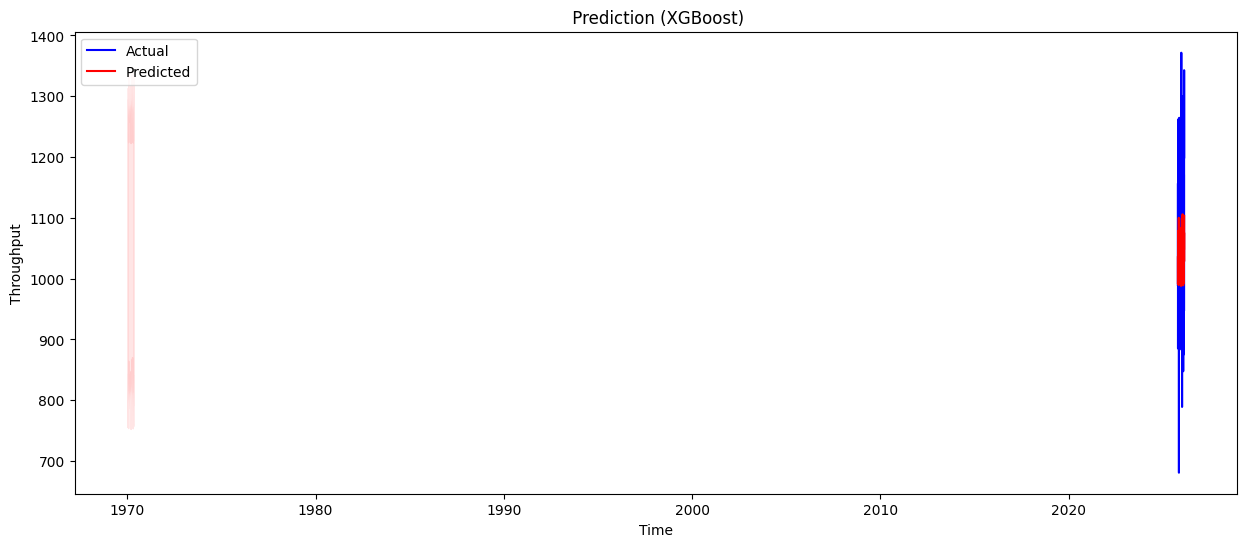


Test RMSE: $120.37
Test MAPE: 9.13%


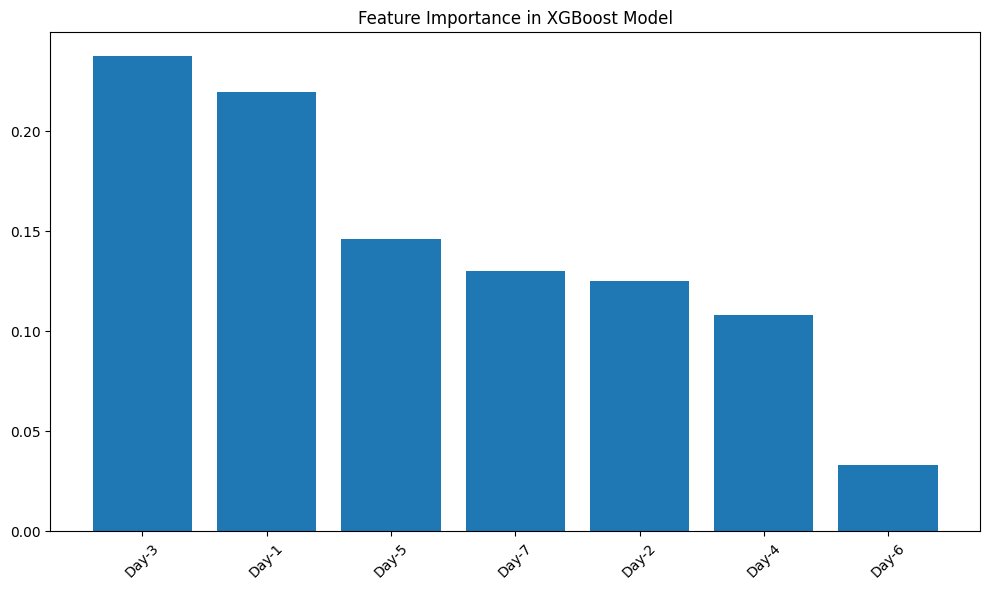


Last 10 Predictions vs Actual Values:
-------------------------------------
        Date       Actual    Predicted  Difference
0 2026-02-12   883.333333   992.643250  109.309916
1 2026-02-13   935.583333  1039.090942  103.507609
2 2026-02-14  1143.791667  1048.615723  -95.175944
3 2026-02-15  1027.333333  1029.240723    1.907389
4 2026-02-16  1013.916667  1076.587769   62.671102
5 2026-02-17  1170.916667  1048.152832 -122.763835
6 2026-02-18   947.083333  1047.629883  100.546549
7 2026-02-19  1126.083333  1075.556152  -50.527181
8 2026-02-20  1342.750000  1028.350586 -314.399414
9 2026-02-21  1199.437500  1103.216431  -96.221069

Model Performance Statistics:
--------------------------
Number of training samples: 287
Number of test samples: 123
RMSE: 120.37
MAPE: 9.13%
Standard Deviation of Error: $117.54


In [55]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# Function to create features for XGBoost
def create_features(data, lookback):
    X, y = [], []
    for i in range(len(data)-lookback):
        feature_set = data[i:(i+lookback)].flatten()  # Flatten the lookback window
        X.append(feature_set)
        y.append(data[i+lookback])
    return np.array(X), np.array(y).reshape(-1)  # Ensure proper shapes

# Read and prepare data
df = pd.read_csv('metrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df = df.resample('D').mean()
df = df.dropna()

# Prepare data
throughput = df.throughput.values
scaler = MinMaxScaler()
throughput_scaled = scaler.fit_transform(throughput.reshape(-1, 1)).flatten()  # Flatten after scaling

# Create features with 7 days lookback
lookback = 7
X, y = create_features(throughput_scaled, lookback)

# Ensure proper shapes for XGBoost
X = X.reshape(X.shape[0], -1)  # Reshape X to 2D array
y = y.reshape(-1)  # Reshape y to 1D array

# Split data
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50
)

# Train model
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
rmse = sqrt(mean_squared_error(y_test_actual, predictions))
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

# Plot results
plt.figure(figsize=(15, 6))
plt.plot(df.index[train_size+lookback:], y_test_actual, label='Actual', color='blue')
plt.plot(df.index[train_size+lookback:], predictions, label='Predicted', color='red')
plt.title(' Prediction (XGBoost)')
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.legend()

# Add confidence intervals
std_dev = np.std(predictions - y_test_actual)
plt.fill_between(
    range(len(predictions)),
    predictions.flatten() - 2*std_dev,
    predictions.flatten() + 2*std_dev,
    color='red',
    alpha=0.1,
    label='95% Confidence Interval'
)
plt.show()

# Print metrics
print(f'\nTest RMSE: ${rmse:.2f}')
print(f'Test MAPE: {mape:.2f}%')

# Feature importance plot
plt.figure(figsize=(10, 6))
feature_names = [f'Day-{i}' for i in range(lookback, 0, -1)]
importance_dict = dict(zip(feature_names, model.feature_importances_))
sorted_importance = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

plt.bar(sorted_importance.keys(), sorted_importance.values())
plt.title('Feature Importance in XGBoost Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print last 10 predictions
print("\nLast 10 Predictions vs Actual Values:")
print("-------------------------------------")
last_10_df = pd.DataFrame({
    'Date': df.index[train_size+lookback:][-10:],
    'Actual': y_test_actual[-10:].flatten(),
    'Predicted': predictions[-10:].flatten(),
    'Difference': predictions[-10:].flatten() - y_test_actual[-10:].flatten()
})
print(last_10_df)

# Print model performance statistics
print("\nModel Performance Statistics:")
print("--------------------------")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Standard Deviation of Error: ${std_dev:.2f}")